In [136]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve 

# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# model explainability
from sklearn.tree import export_graphviz
import shap
import graphviz

In [2]:
data = pd.read_csv('Targeting_right_customer.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data1=data.copy()

In [4]:
# Dataset Rows & Columns count
print("Dataset consist ", data1.shape[0]," rows and ",data1.shape[1],"columns.")

Dataset consist  9240  rows and  37 columns.


In [5]:
# Dataset Info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Dataset Duplicate Value Count
data1[data1.duplicated()].count()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [8]:
# Missing Values/Null Values Count
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
data1.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [10]:
high_null=data1.isnull().sum()/len(data)
high_null.sort_values(ascending=False)

Lead Quality                                     0.515909
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [11]:
data1=data1.drop(["Asymmetrique Activity Index","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index"],axis=1)

In [12]:
data1.shape

(9240, 33)

In [13]:
# no. of unique variables
for i in data1.select_dtypes("O").columns:
    print('Column name :',i)
    print(data1[i].unique())
    print('Number of unique values : ',data1[i].nunique())
    print()
    print('*'*75)

Column name : Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Number of unique values :  9240

***************************************************************************
Column name : Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Number of unique values :  5

***************************************************************************
Column name : Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Number of unique values :  21

************************************************************

In [14]:
data1=data1.drop(["Prospect ID","Lead Number"],axis=1)

In [15]:
data1=data1.replace("Select",np.nan)

In [16]:
data1.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,No,No,Email Opened


In [17]:
for i in data1.select_dtypes("O").columns:
    print('Column name :',i)
    print(data1[i].value_counts())
    print()
    print('*'*75)
    

Column name : Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

***************************************************************************
Column name : Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

***************************************************************************
Column name 

In [18]:
data1["Lead Origin"].isnull().sum()

0

In [19]:
data1["Lead Quality"].isnull().sum()

4767

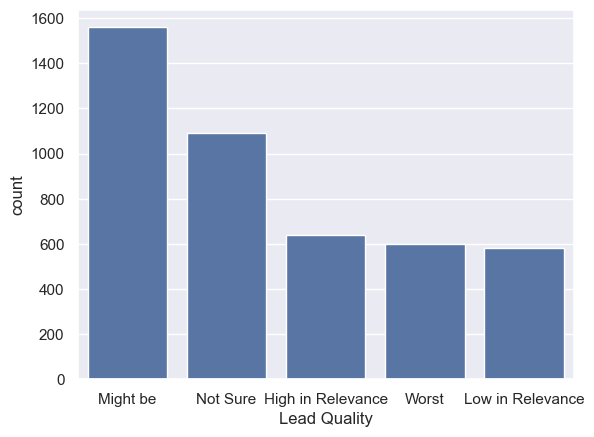

In [20]:
Lead_data=data1["Lead Quality"].value_counts().reset_index()
Lead_data.columns=["Lead Quality","count"]

sns.barplot(x="Lead Quality",y="count",data=Lead_data)
plt.show()

#### we are not sure about the client lead quality , we should handle the missing with Not Sure

In [21]:
data1["Lead Quality"]=data1["Lead Quality"].replace(np.nan,"Not Sure")

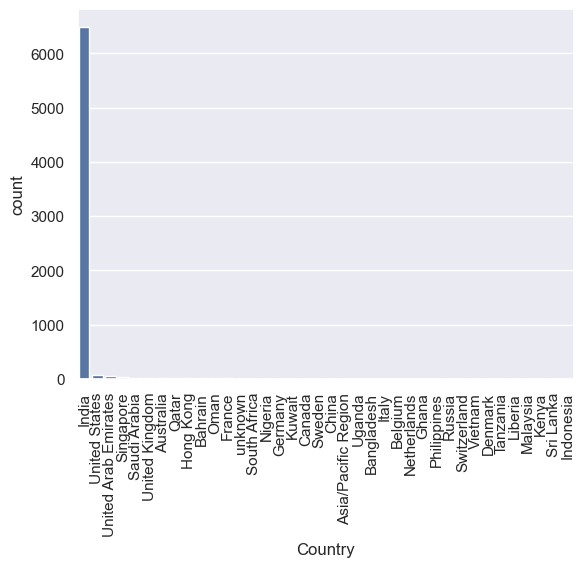

In [22]:
country_data=data1["Country"].value_counts().reset_index()
country_data.columns=["Country","count"]
plt.xticks(rotation=90)
sns.barplot(x="Country",y="count",data=country_data)
plt.show()

#### the country column has 95% data from India.

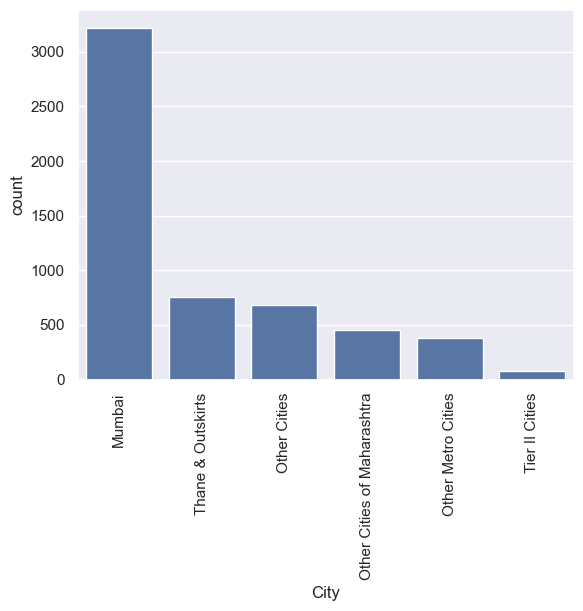

In [23]:
#city
city_data=data1["City"].value_counts().reset_index()
city_data.columns=["City","count"]
plt.xticks(rotation=90)
sns.barplot(x="City",y="count",data=city_data)
plt.show()

In [24]:
data["City"].isnull().sum()

1420

In [25]:
data1["City"]=data1["City"].replace(np.nan,"Mumbai")

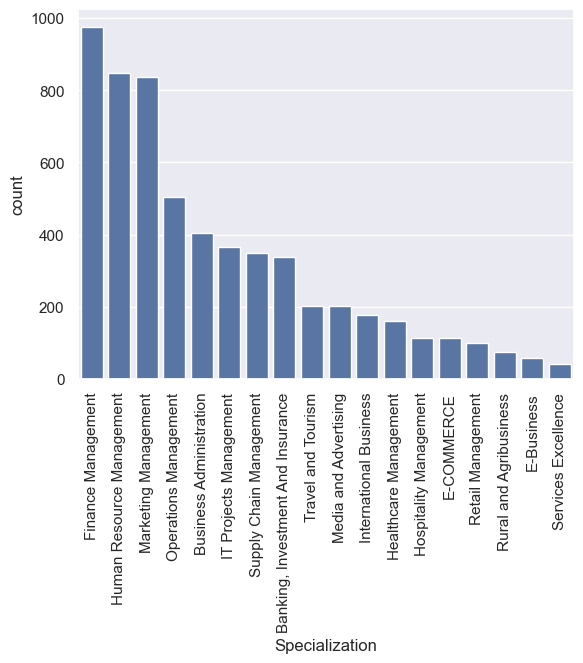

In [26]:
#specialization
city_data=data1["Specialization"].value_counts().reset_index()
city_data.columns=["Specialization","count"]
plt.xticks(rotation=90)
sns.barplot(x="Specialization",y="count",data=city_data)
plt.show()

In [27]:
data1["Specialization"].isnull().sum()

3380

In [28]:
data1["Specialization"]=data1["Specialization"].replace(np.nan,"Others")

In [29]:
data1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [30]:
high_null1=data1.isnull().sum()/len(data)
high_null1.sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Quality                                     0.000000
Update me on Supply Chain Content                0.000000
Lead Origin                                      0.000000
Get updates on DM Content                        0.000000
Through Recommendations                          0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of

In [31]:
high_missing=high_null1[high_null1>0.70].index
high_missing

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [32]:
data1=data1.drop(high_missing,axis=1)

In [33]:
data1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

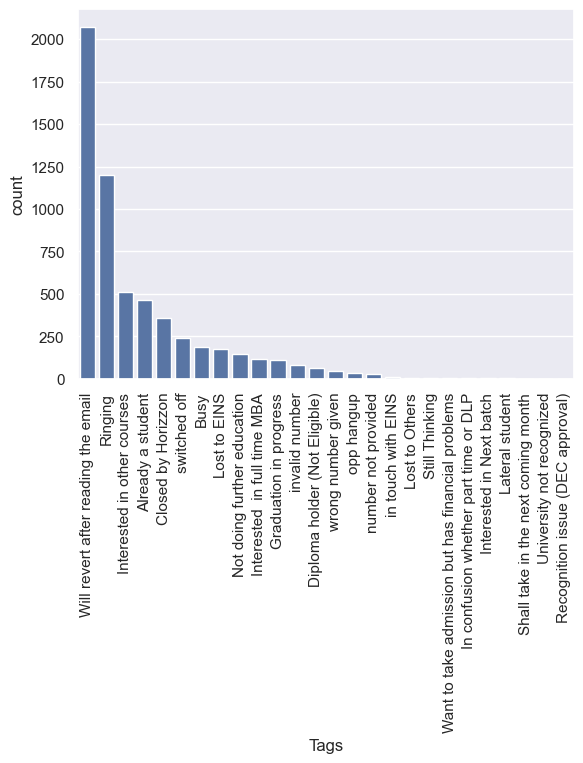

In [34]:
#Tags
city_data=data1["Tags"].value_counts().reset_index()
city_data.columns=["Tags","count"]
plt.xticks(rotation=90)
sns.barplot(x="Tags",y="count",data=city_data)
plt.show()

In [35]:
data1["Tags"]=data1["Tags"].replace(np.nan,"No comments")

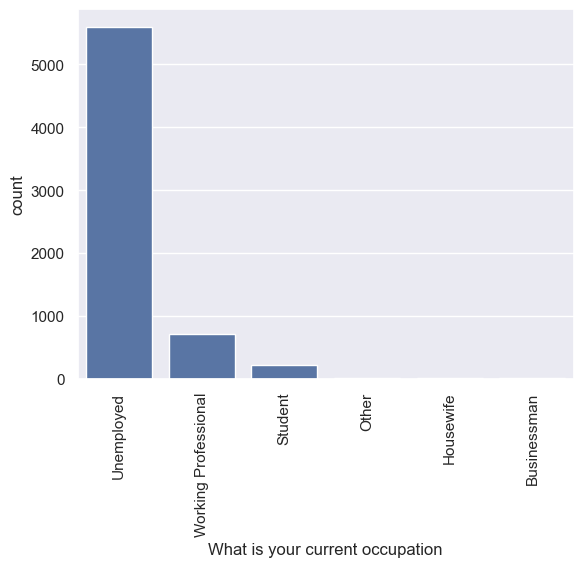

In [36]:
#What is your current occupation
city_data=data["What is your current occupation"].value_counts().reset_index()
city_data.columns=["What is your current occupation","count"]
plt.xticks(rotation=90)
sns.barplot(x="What is your current occupation",y="count",data=city_data)
plt.show()

In [37]:
data1["What is your current occupation"]=data1["What is your current occupation"].replace(np.nan,"Other")

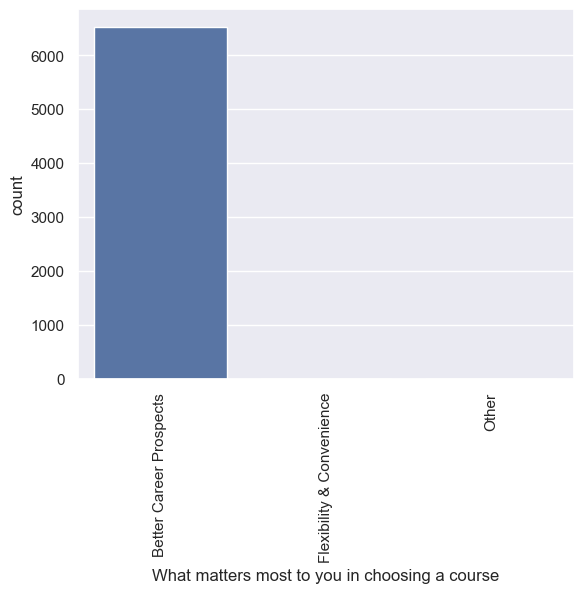

In [38]:
#What matters most to you in choosing a course
city_data=data1["What matters most to you in choosing a course"].value_counts().reset_index()
city_data.columns=["What matters most to you in choosing a course","count"]
plt.xticks(rotation=90)
sns.barplot(x="What matters most to you in choosing a course",y="count",data=city_data)
plt.show()

In [39]:
data1["What matters most to you in choosing a course"]=data1["What matters most to you in choosing a course"].replace(np.nan,"Other")

In [40]:
data1["Country"]=data1["Country"].replace(np.nan,"India")

In [41]:
(data1.isnull().sum()/len(data)*100).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Lead Origin                                      0.000000
Newspaper                                        0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Lead Quality                                     0.000000
Tags                                             0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Magazine                                         0.000000
X Education Fo

In [42]:
data1=data1.dropna()

In [43]:
data1.isnull().sum().sum()

0

# Univariate Analysis

In [44]:
data1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
data1["Converted"].value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

Converted
0    5639
1    3435
Name: count, dtype: int64


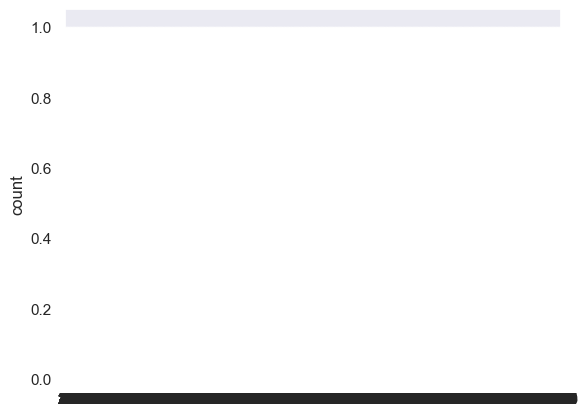

In [46]:
sns.countplot(data1["Converted"])
print(data1['Converted'].value_counts())

In [47]:
# value_count function to find univariant columns
for i in data1.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data1[i].value_counts())

#######################  

Lead Origin


Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
#######################  

Lead Source


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
#######################  

Do Not Email


Do Not Email
No     8358
Yes     716
Name: count, dtype: int64
#######################  

Do Not Call


Do Not Call
No     907

In [48]:
data2=data1.drop(["Do Not Call","Country","What matters most to you in choosing a course","Search",
                    "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                   "Through Recommendations","Receive More Updates About Our Courses",
                   "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                   ],axis=1)

In [49]:
data2.shape

(9074, 15)

In [50]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   object 
 

In [51]:
data2=data1.drop(["Do Not Call","Country","What matters most to you in choosing a course","Search",
                    "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                   "Through Recommendations","Receive More Updates About Our Courses",
                   "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                   ],axis=1)

<Figure size 640x480 with 0 Axes>

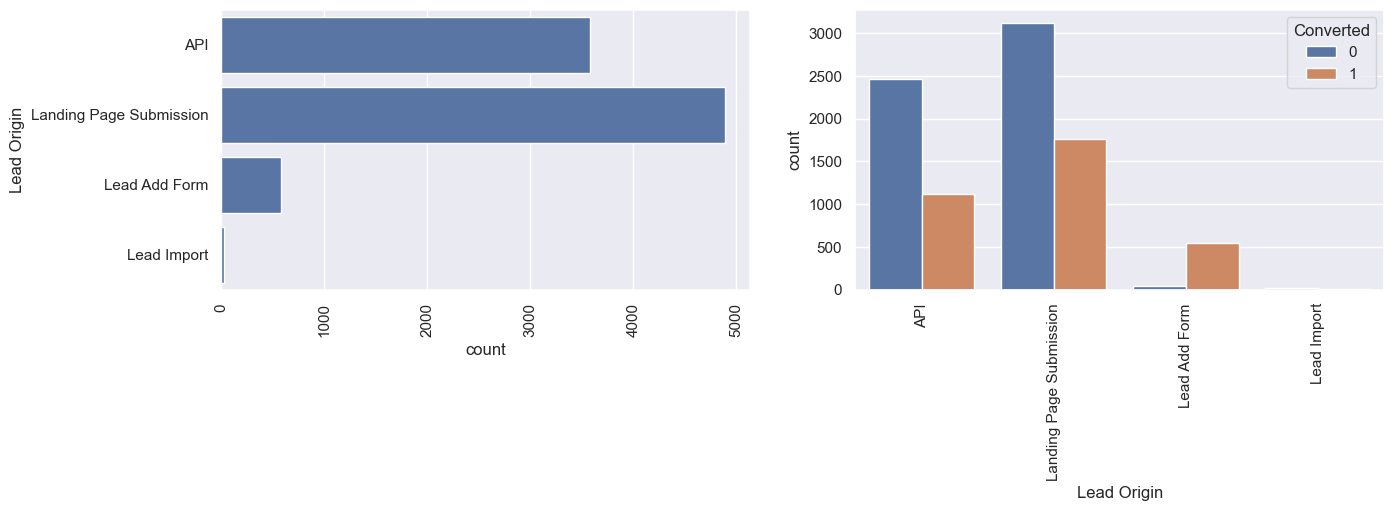

In [52]:
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data2['Lead Origin'])
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(x=data2['Lead Origin'],hue = data2['Converted'])
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

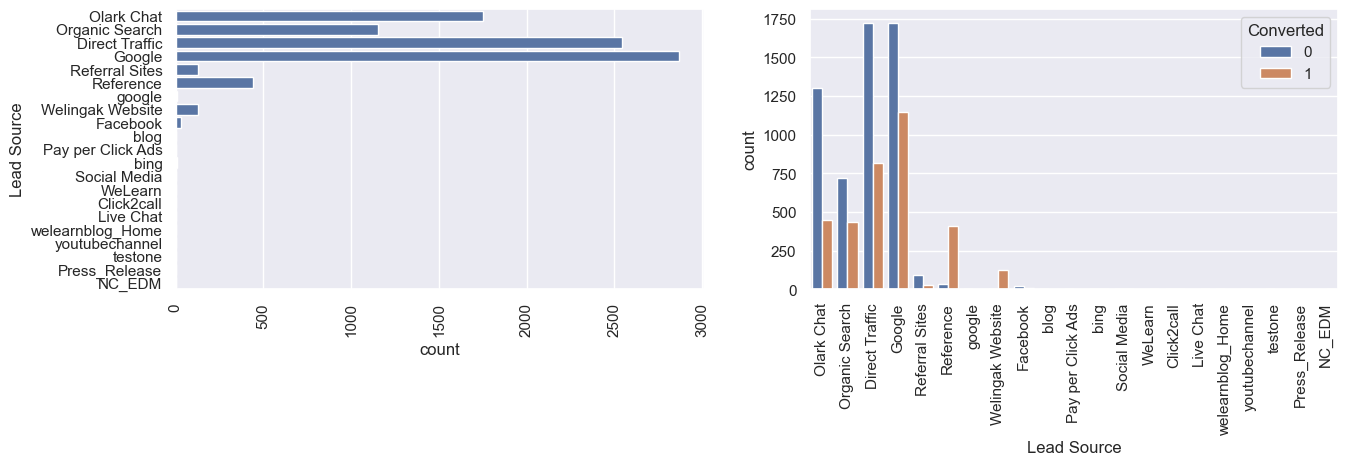

In [53]:
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data2['Lead Source'])
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(x=data2['Lead Source'],hue = data2['Converted'])
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

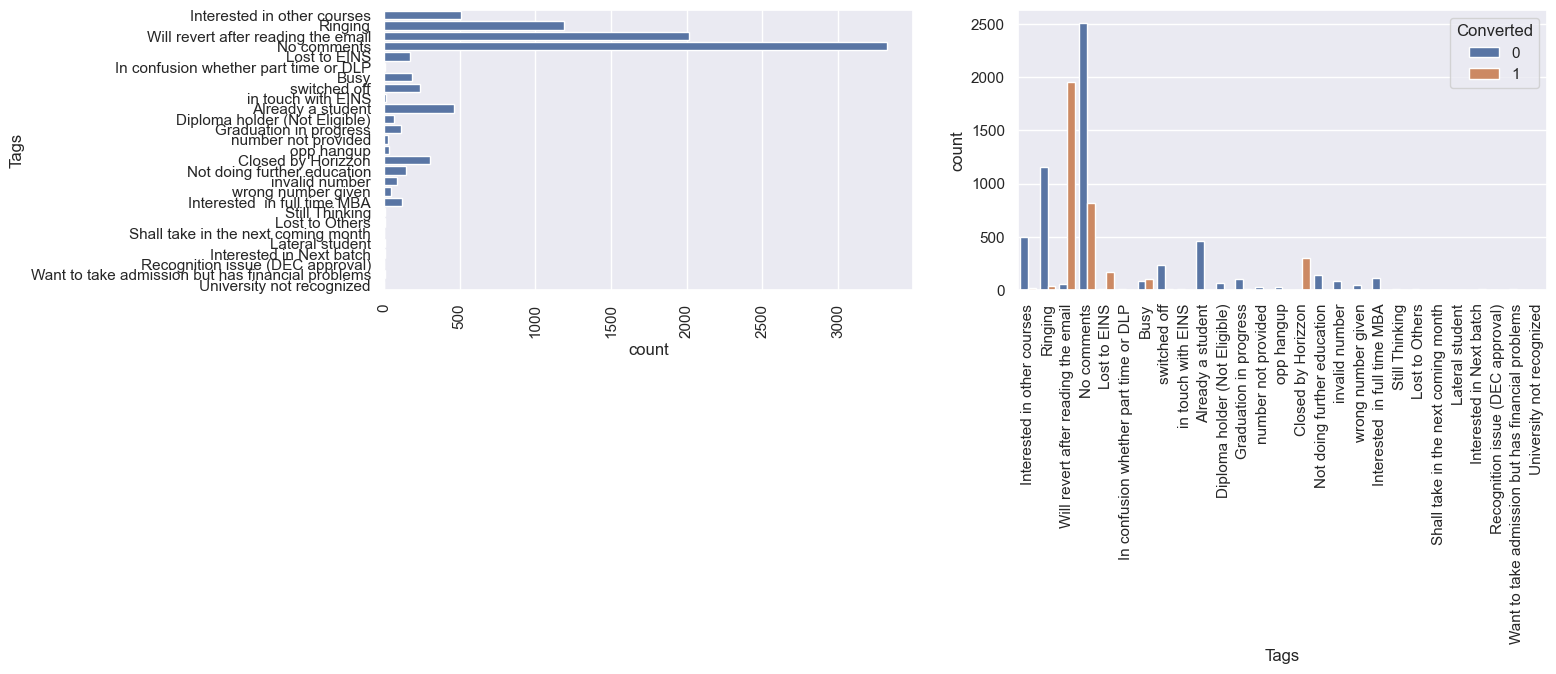

In [54]:
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data2['Tags'])
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(x=data2['Tags'],hue = data2['Converted'])
plt.xticks(rotation=90)
plt.show()

In [55]:
data2["Tags"]=data2["Tags"].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given",
                                       "opp hangup","number not provided","in touch with EINS","Lost to Others",
                                       "Still Thinking","Want to take admission but has financial problems",
                                       "In confusion whether part time or DLP","Interested in Next batch",
                                       "Lateral student","Shall take in the next coming month",
                                       "University not recognized","Recognition issue (DEC approval)",
                                       "Graduation in progress"],"OTHER_COMMENT")
                                       

In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   object 
 

<Figure size 640x480 with 0 Axes>

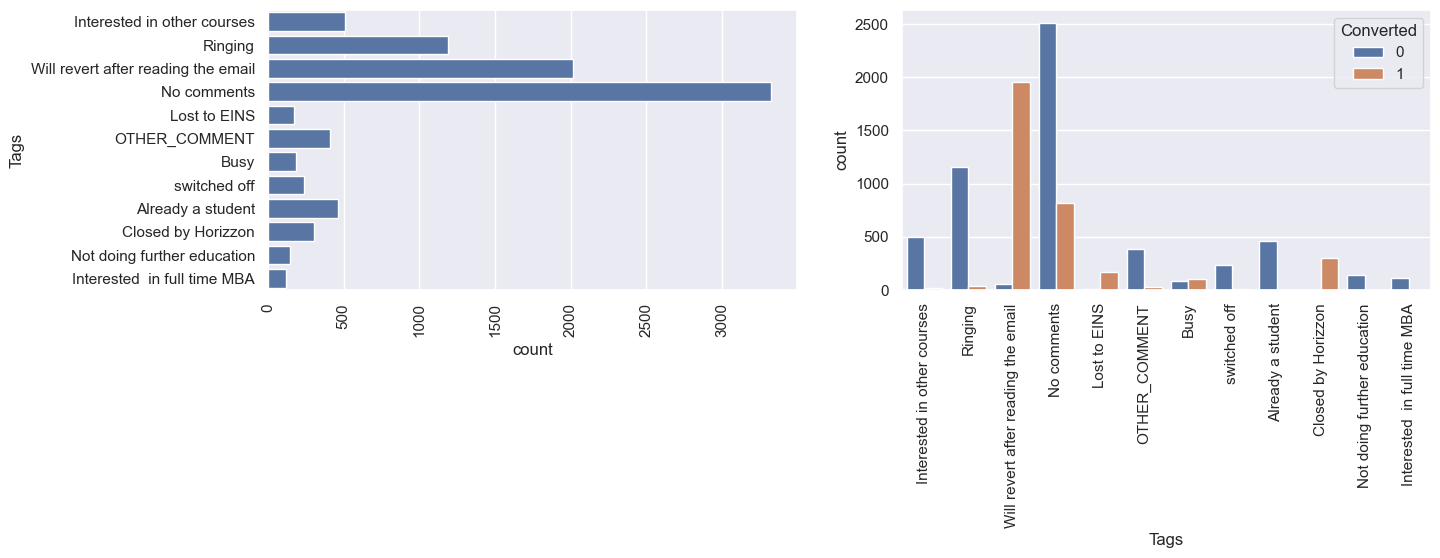

In [57]:
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data2['Tags'])
plt.xticks(rotation=90)
plt.subplot(222)
sns.countplot(x=data2['Tags'],hue = data2['Converted'])
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

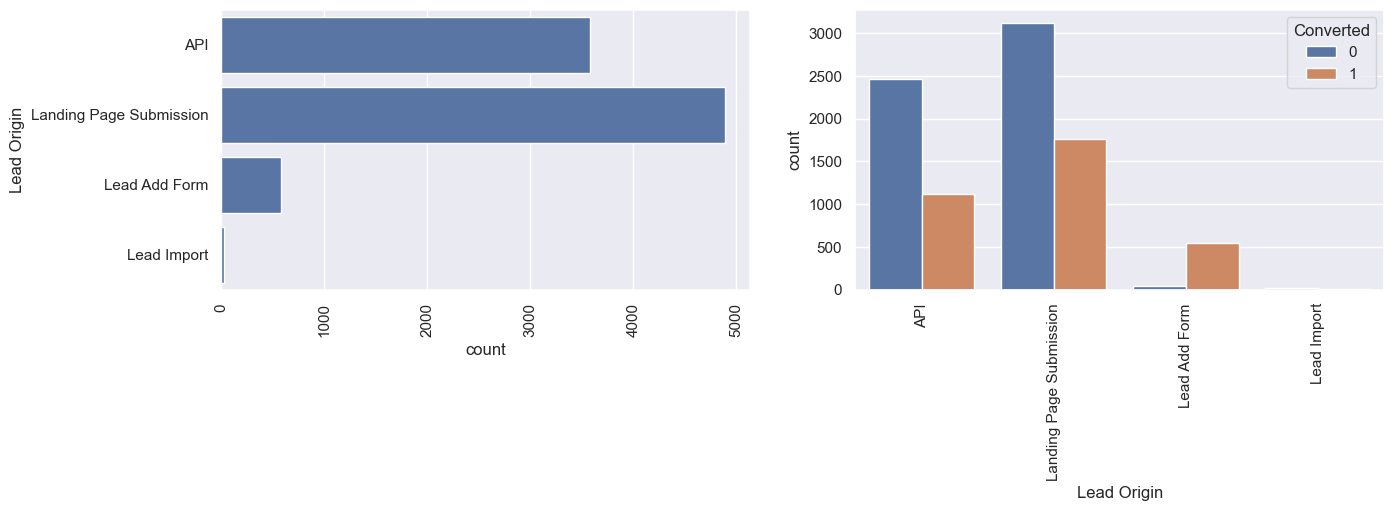

<Figure size 640x480 with 0 Axes>

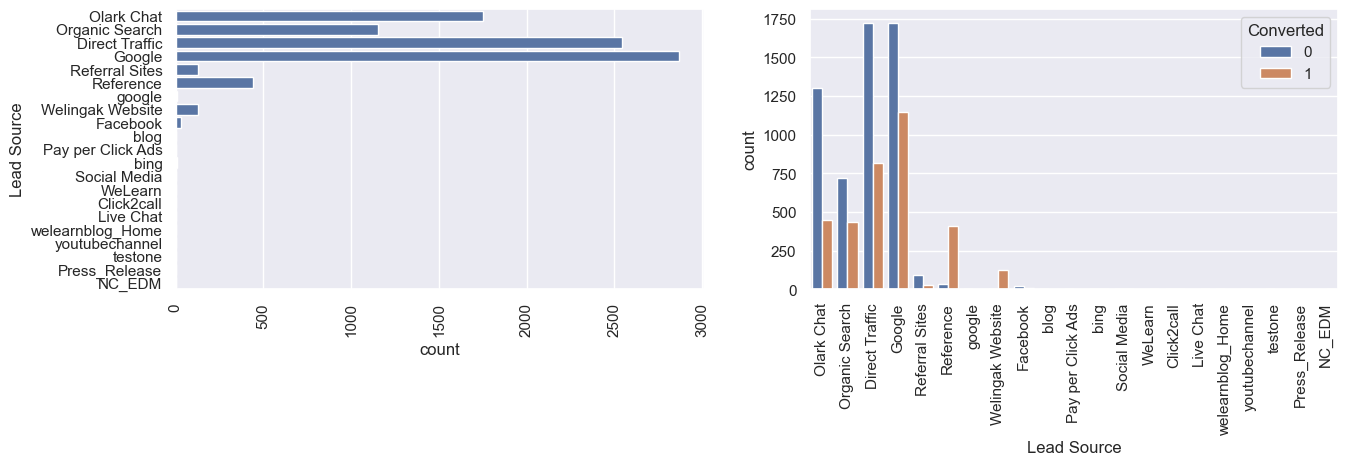

<Figure size 640x480 with 0 Axes>

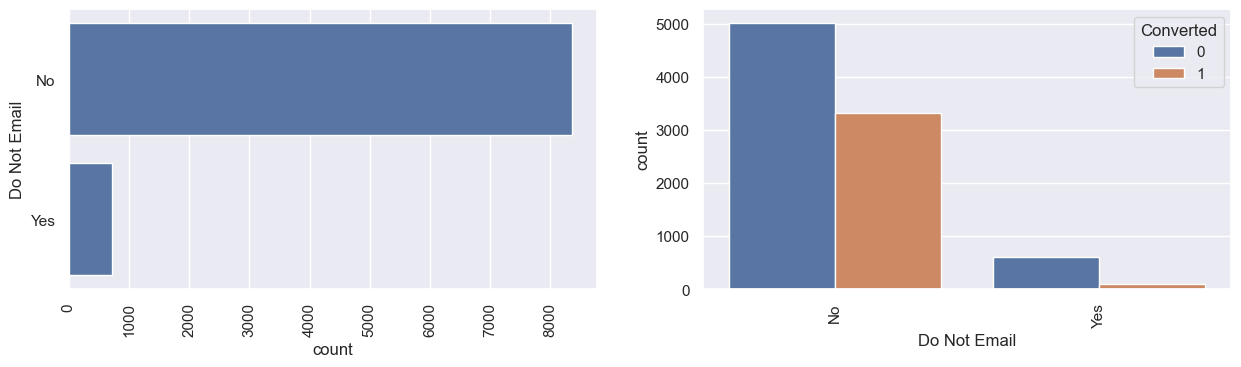

<Figure size 640x480 with 0 Axes>

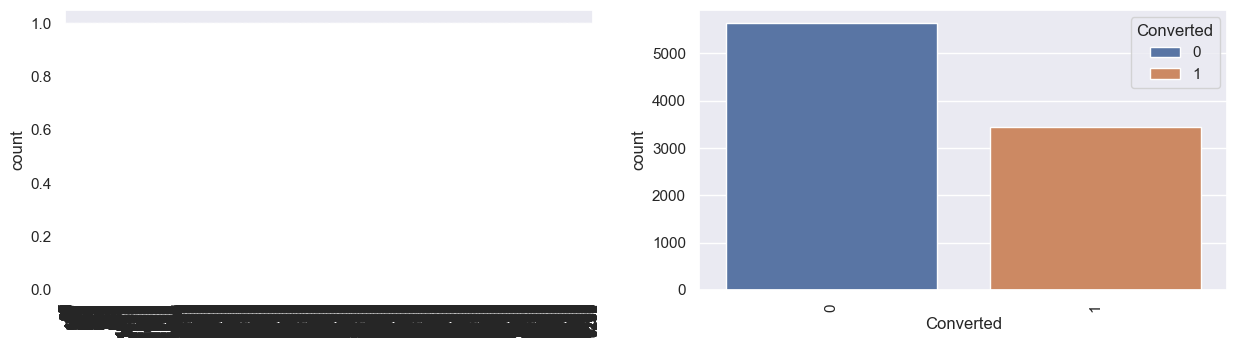

<Figure size 640x480 with 0 Axes>

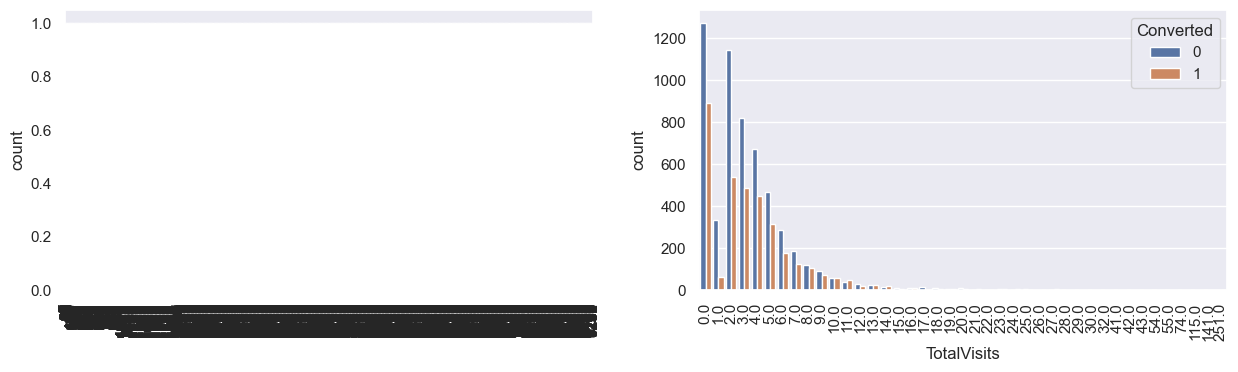

<Figure size 640x480 with 0 Axes>

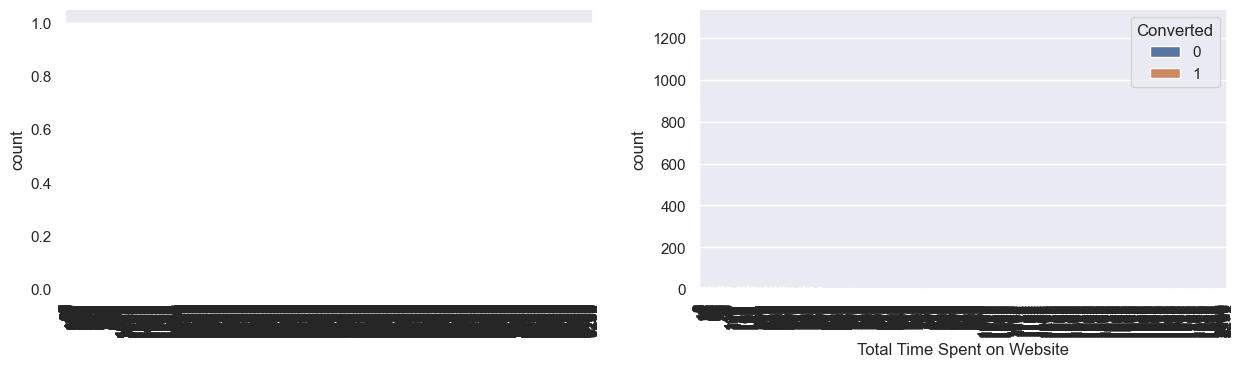

<Figure size 640x480 with 0 Axes>

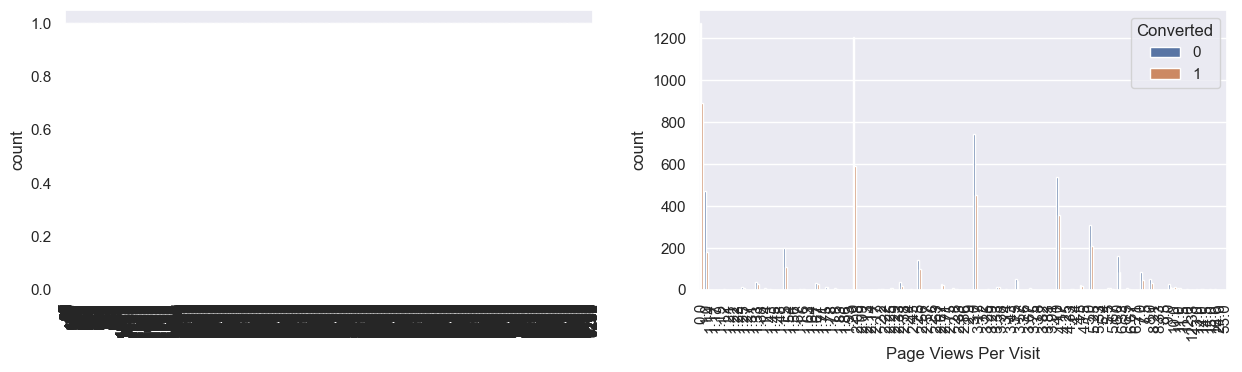

<Figure size 640x480 with 0 Axes>

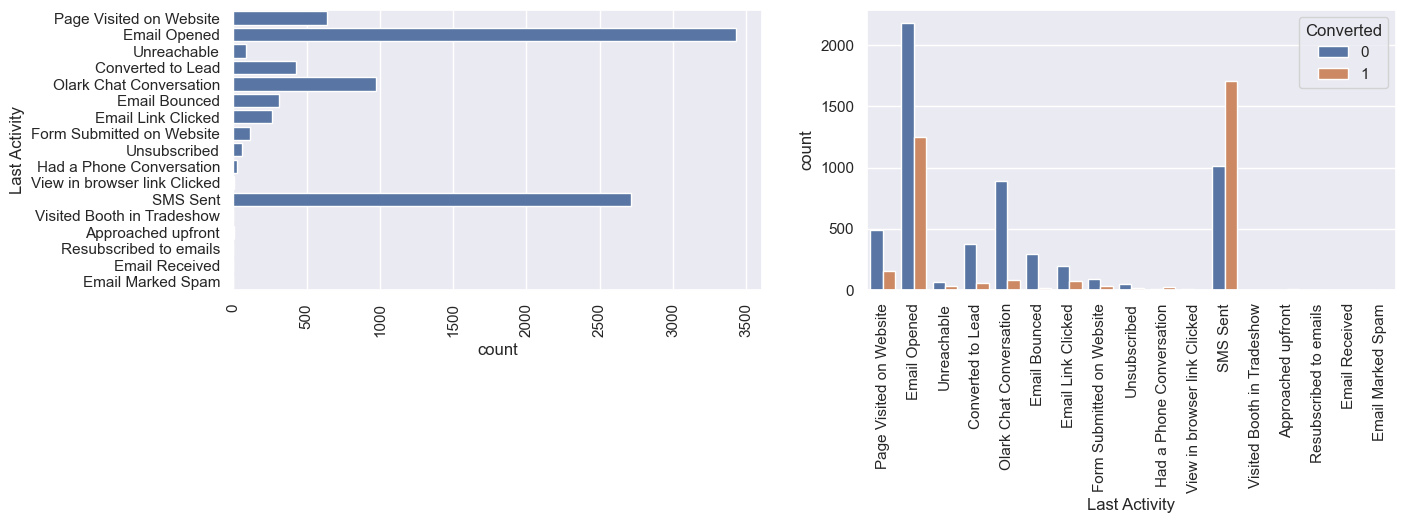

<Figure size 640x480 with 0 Axes>

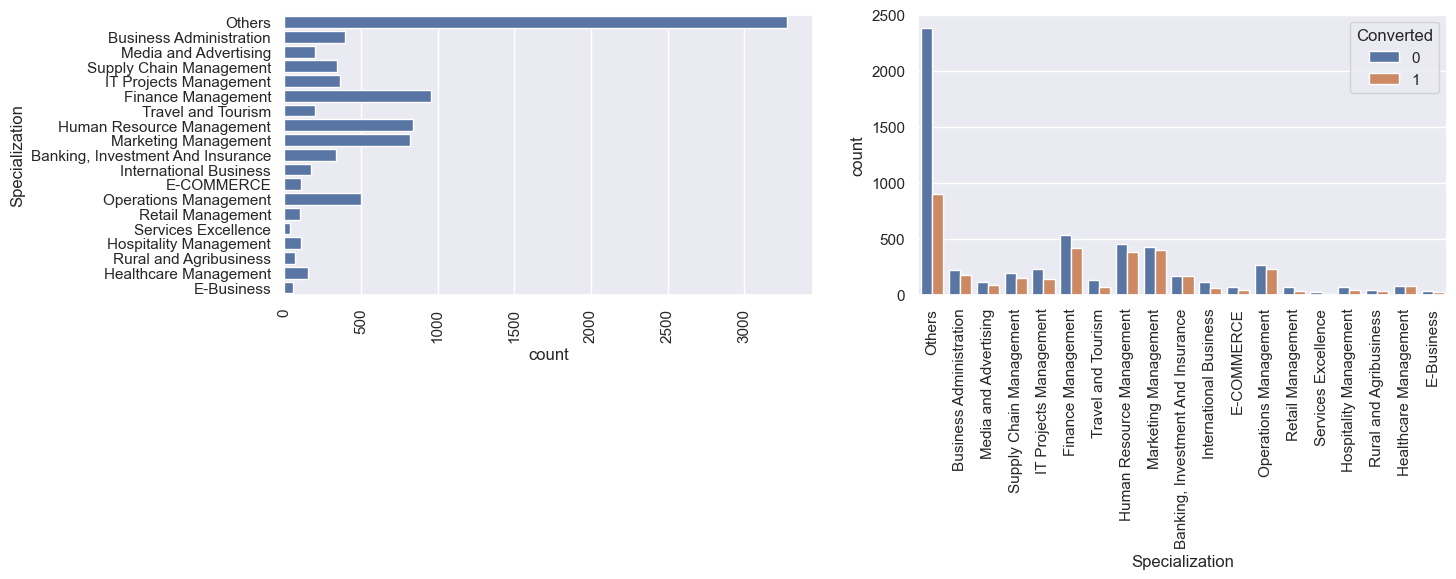

<Figure size 640x480 with 0 Axes>

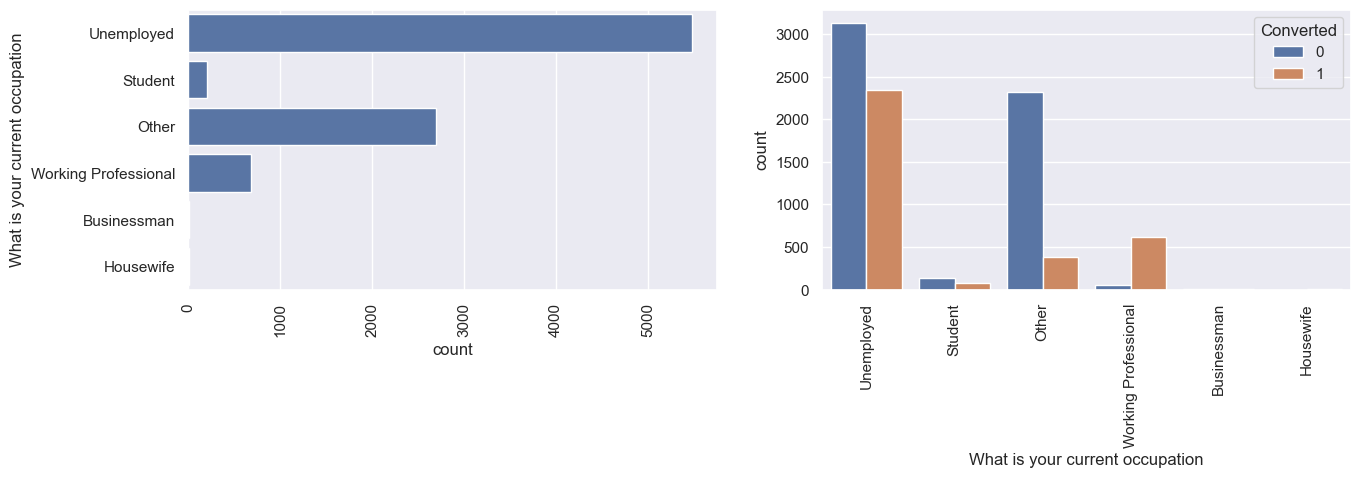

<Figure size 640x480 with 0 Axes>

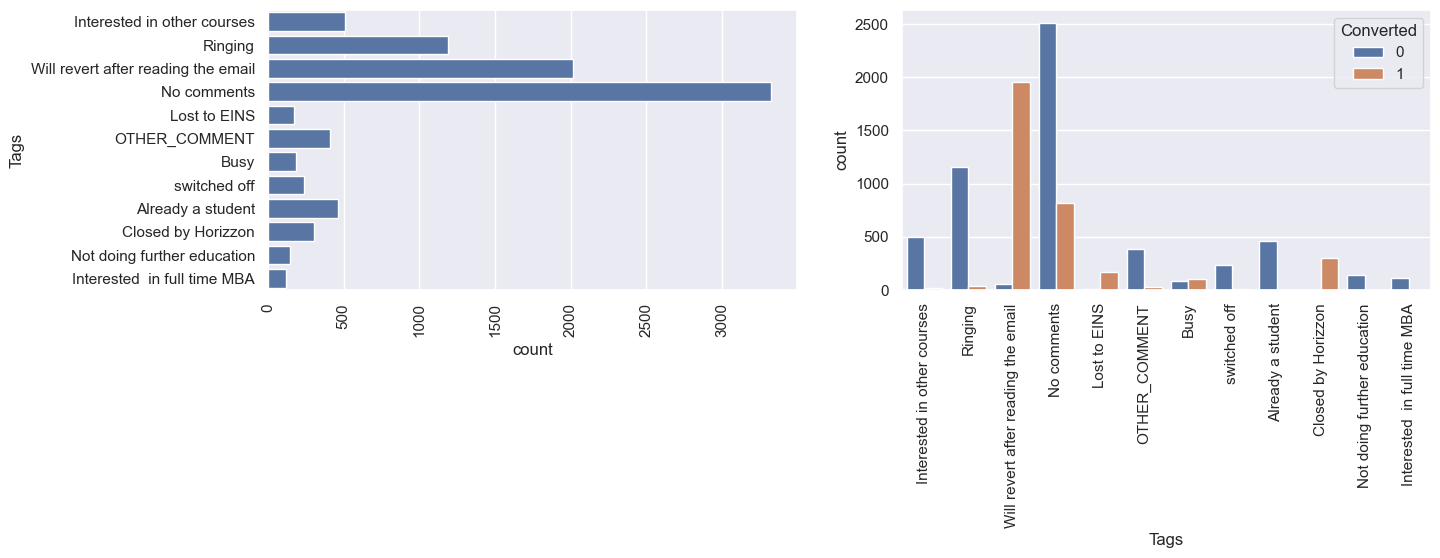

<Figure size 640x480 with 0 Axes>

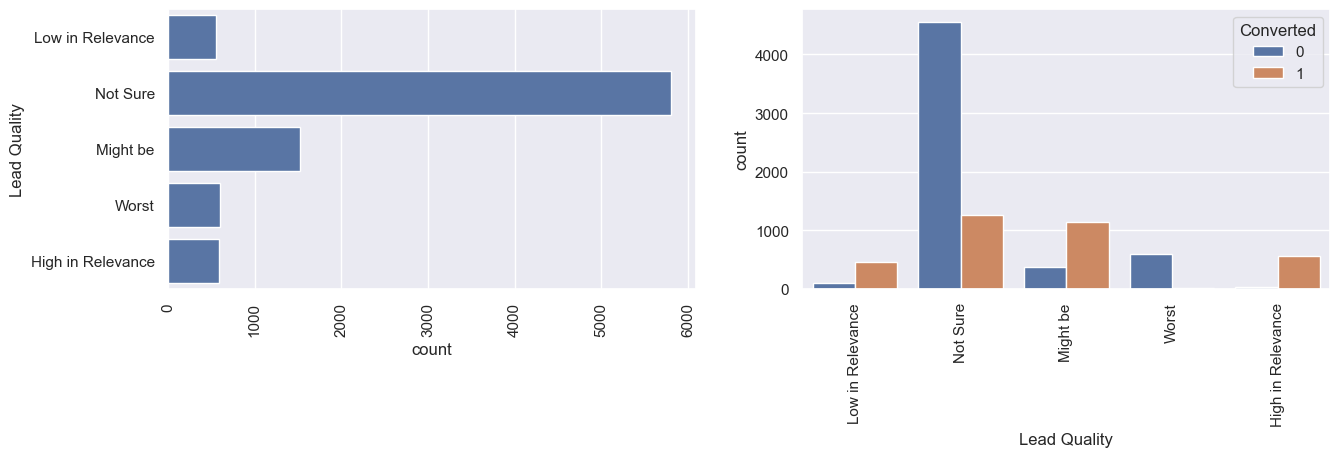

<Figure size 640x480 with 0 Axes>

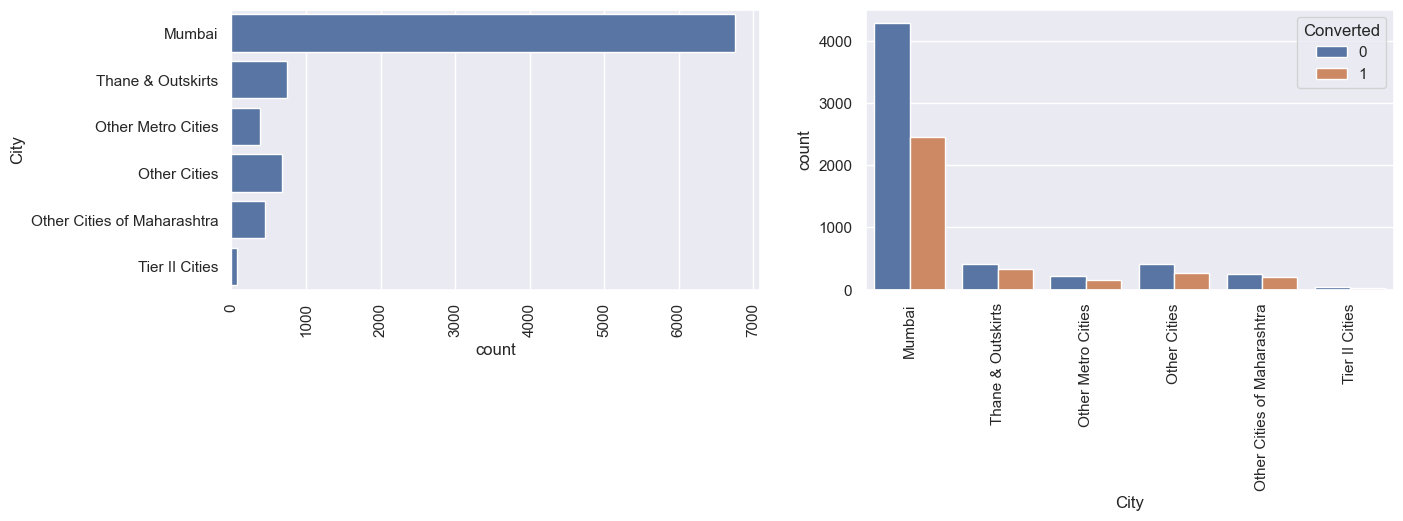

<Figure size 640x480 with 0 Axes>

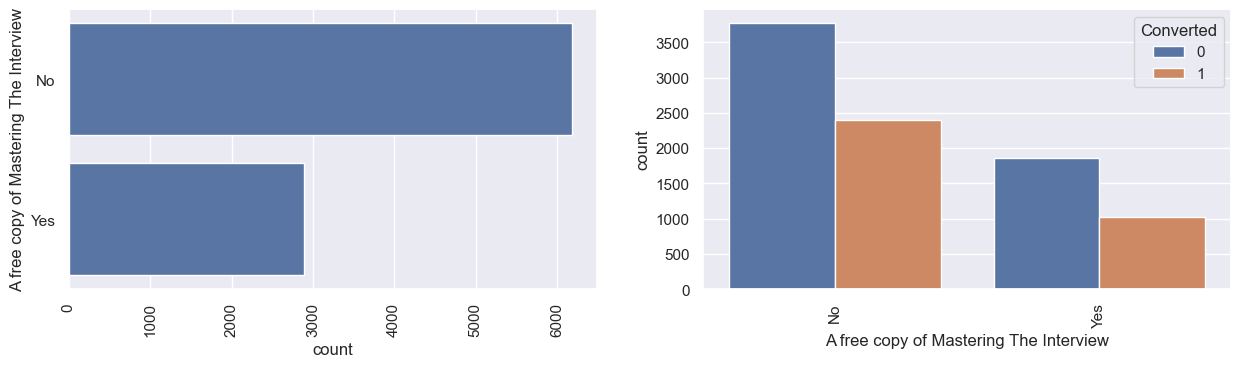

<Figure size 640x480 with 0 Axes>

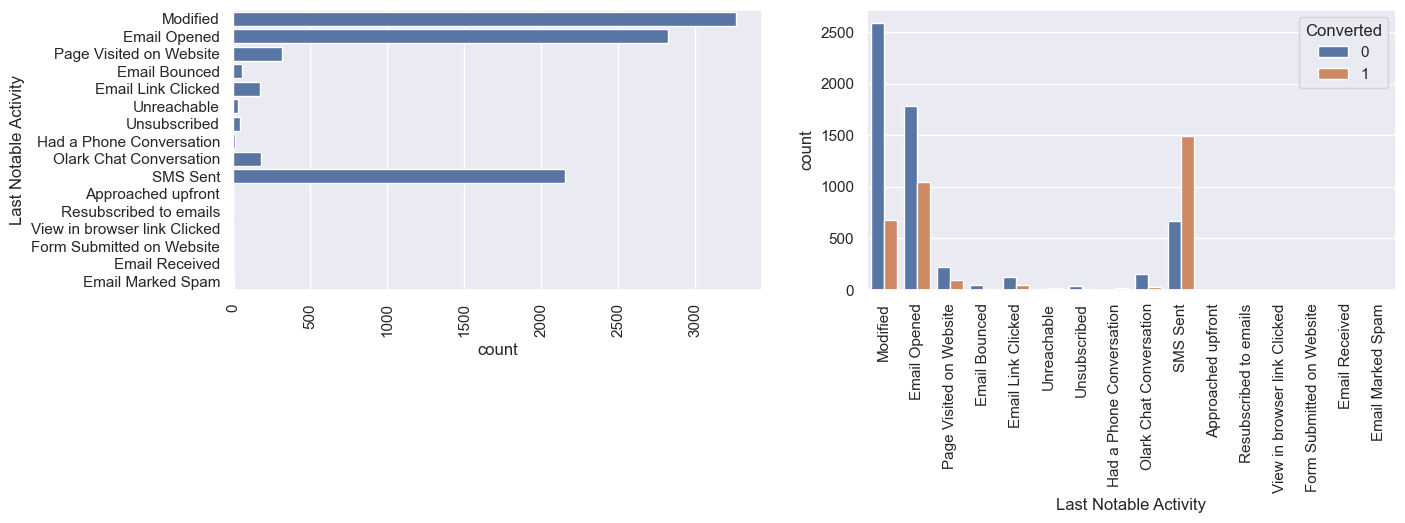

In [58]:
for i in data2.columns:
    plt.figure(1)
    plt.figure(figsize= (15,8))
    plt.subplot(221)
    sns.countplot(data2[i])
    plt.xticks(rotation=90)
    plt.subplot(222)
    sns.countplot(x=data2[i],hue = data2['Converted'])
    plt.xticks(rotation=90)
    plt.show()

In [59]:
# # map to convert two category column
# data2["Do Not Email"]=data2["Do Not Email"].map({"Yes":1,"No":0})
# data2["A free copy of Mastering The Interview"]=data2["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [60]:
#lets see the correlation matrix
corr_matrix=data2.corr()
sns.heatmap(corr_matrix,annot=True)

ValueError: could not convert string to float: 'API'

In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   object 
 

In [62]:
data2.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [63]:
# model building process
X=data2.drop(["Converted"],axis=1)
Y=data2["Converted"]

In [135]:
trf1 = ColumnTransformer(transformers =[ 
    ('scaler', MinMaxScaler(), ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]), 
    ('ohe', OneHotEncoder(drop ='first',handle_unknown = 'ignore'), ["Lead Origin","Lead Source","Last Activity","Specialization",
                              "What is your current occupation","Tags","Lead Quality","City","Do Not Email",
                              "Last Notable Activity","A free copy of Mastering The Interview",]),      
], remainder ='passthrough')
prepro_pipeline = Pipeline(steps=[("trf1", trf1)])

In [133]:
# Fit the pipeline and get the transformed column names
prepro_pipeline.fit(df)
transformed_columns = prepro_pipeline.named_steps['trf1'].get_feature_names_out()

# Print the transformed column names
print(transformed_columns)

['scaler__TotalVisits' 'scaler__Total Time Spent on Website'
 'scaler__Page Views Per Visit']


In [118]:
X_scaled = prepro_pipeline.fit_transform(X)

In [126]:
X_scaled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 94265 stored elements and shape (9074, 102)>

In [120]:
X = prepro_pipeline.fit_transform(X)

In [121]:
XX.shape

(1, 3)

In [66]:
X_scaled.shape

(9074, 102)

In [67]:
import joblib
joblib.dump(prepro_pipeline, '.\..\savedmodels\prepro_pipeline.pkl')

['.\\..\\savedmodels\\prepro_pipeline.pkl']

In [68]:
def evaluation_matrix(y_train_pred, y_test_pred, y_train,y_test):
    '''
    This function take predicted and actual value and return the various evaluation metric along with the confusion matrix plot
    '''
    # (1)  calculating the train and test roc_auc score
    train_roc_auc = roc_auc_score(y_train,y_train_pred)
    test_roc_auc = roc_auc_score(y_test,y_test_pred)
    print(" The train and test roc_auc score are " ,train_roc_auc, " and ",test_roc_auc)

    # (2) calculating train and test precision score
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test,y_test_pred)
    print(" The train and test precision score are " ,train_precision, " and ",test_precision)

    # (3) calculating train and test recall score
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test,y_test_pred)
    print(" The train and test Recall score are " ,train_recall, " and ",test_recall)

    # (4) calculating the train and test accuracy score
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    print(" The train and test Accuracy score are " ,train_accuracy, " and ",test_accuracy)
    
    # (5) calculating the train and test f1 score
    train_f1_score = f1_score(y_train, y_train_pred)
    test_f1_score = f1_score(y_test,y_test_pred)
    print(" The train and test f1 score are " ,train_f1_score, " and ",test_f1_score)

    # (6) plotting the confusion matrix
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
    test_confusion_matrix = confusion_matrix(y_test,y_test_pred)
    plt.figure(1)
    plt.figure(figsize=(25,10))

    ax= plt.subplot(331)
    sns.heatmap(train_confusion_matrix, annot = True, fmt ='d', ax = ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Train Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

    ax= plt.subplot(332)
    sns.heatmap(test_confusion_matrix, annot = True, fmt ='d', ax = ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_ylim(2.0, 0)
    ax.set_title('Test Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']);
    ax.yaxis.set_ticklabels(['0','1']);

    # (6) plot the train and test roc plot
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    train_AUC_bow = auc(train_fpr, train_tpr)
    test_AUC_bow = auc(test_fpr, test_tpr)

    plt.subplot(333)
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_AUC_bow))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_AUC_bow))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.xlabel("False positive rate: FPR")
    plt.ylabel("True positive rate: TPR")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()
    return train_roc_auc,test_roc_auc, train_accuracy,test_accuracy, test_precision, test_recall


In [69]:
def threshold(Y_train,y_proba_log):
    precision,recall,thresholds=precision_recall_curve(Y_train,y_proba_log[:,1])
    f1_scores=2*(precision*recall)/(precision+recall)
    optimal_idx=np.argmax(f1_scores)
    optimal_threshold=thresholds[optimal_idx]
    print(" The optimal_threshold value is " ,optimal_threshold)
    return optimal_threshold
    

In [70]:
# splitting the data into training testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.8,random_state=400)

In [71]:
# ML Model - 1 Implementation
def LogisticRegressionModel(x_train,x_test,y_train):
    '''
    This function trains the logistic regression model and return the predicted train and test value
    '''

    logistic = LogisticRegression()  # default value of C = 1.0
    # Fit the Algorithm
    logistic.fit(x_train,y_train)
    # Predict on the model
    y_train_pred_log = logistic.predict(x_train)
    y_test_pred_log = logistic.predict(x_test)
    y_proba_log = logistic.predict_proba(x_train)
    return y_train_pred_log,y_test_pred_log,y_proba_log,logistic

y_train_pred_log,y_test_pred_log,y_proba_log,LR = LogisticRegressionModel(X_train,X_test,Y_train)

 The train and test roc_auc score are  0.9337960873766753  and  0.9379137011932047
 The train and test precision score are  0.9371688115064345  and  0.9289855072463769
 The train and test Recall score are  0.9043097151205259  and  0.9196556671449068
 The train and test Accuracy score are  0.9410387105661937  and  0.9421487603305785
 The train and test f1 score are  0.9204460966542751  and  0.9242970439798125


<Figure size 640x480 with 0 Axes>

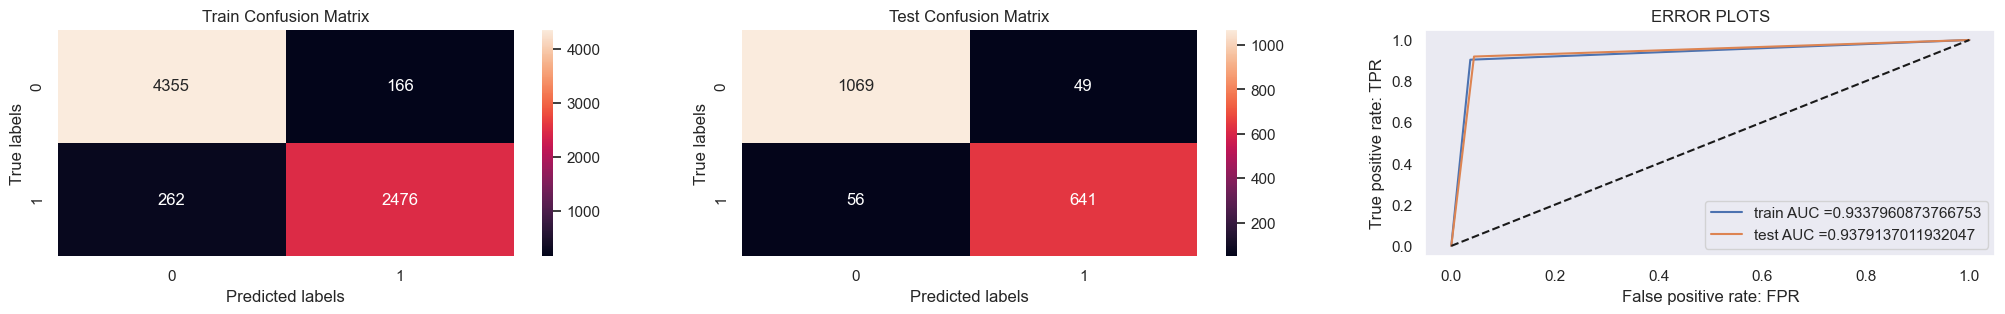

 The optimal_threshold value is  0.4431549571629651


In [72]:
train_roc_auc_log,test_roc_auc_log, train_accuracy_log,test_accuracy_log, test_precision_log, test_recall_log= evaluation_matrix(y_train_pred_log, y_test_pred_log, Y_train,Y_test)
logistic_thresholds = threshold(Y_train,y_proba_log)

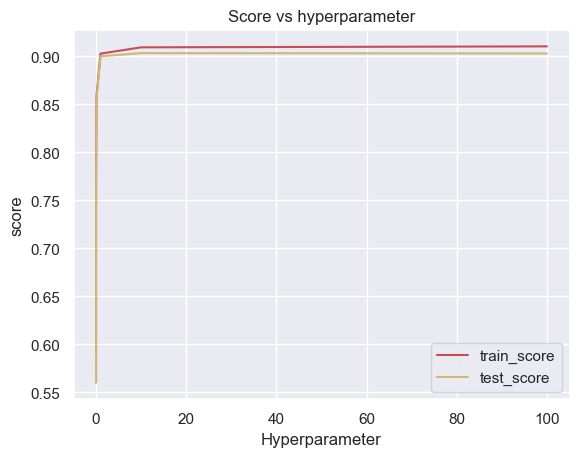

{'C': 10}
*** Scores from the best model ***
 The train and test roc_auc score are  0.9350692628459448  and  0.9397115930014398
 The train and test precision score are  0.9356417011667294  and  0.9241773962804005
 The train and test Recall score are  0.9079620160701242  and  0.926829268292683
 The train and test Accuracy score are  0.9417275106764017  and  0.9426997245179063
 The train and test f1 score are  0.9215940685820204  and  0.9255014326647565


<Figure size 640x480 with 0 Axes>

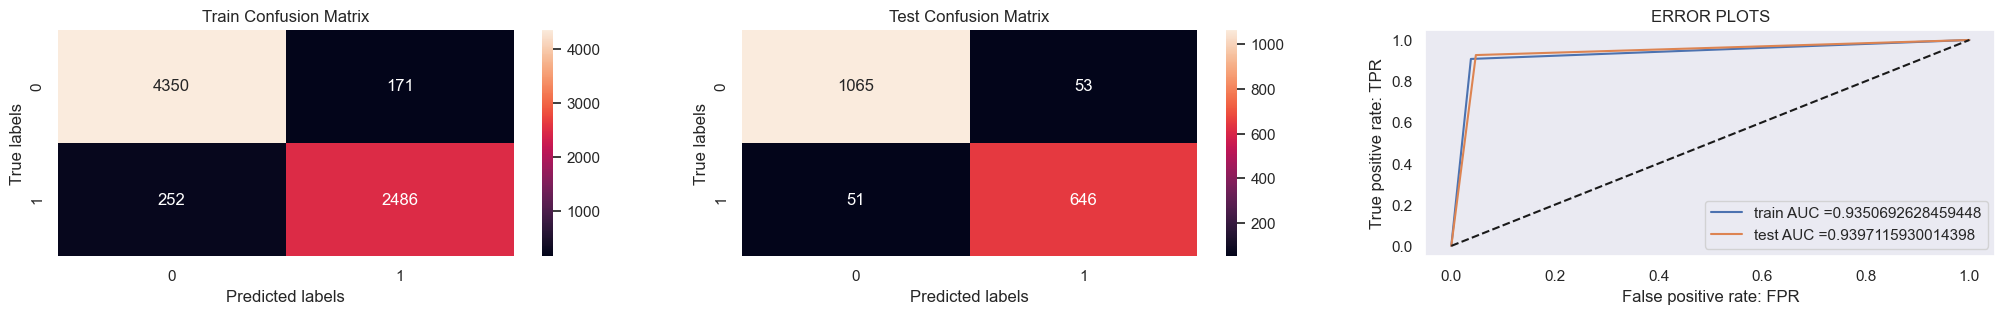

 The optimal_threshold value is  0.44084761037758075


In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# c is the hyper parameter for logistic regression
parameter = {'C' : [10**i for i in range(-3,3)]}

# calling the estimator
logistic = LogisticRegression()

# GridSearchCV
Gslr = GridSearchCV
Gslr = GridSearchCV(estimator = logistic,param_grid = parameter,scoring ='recall', refit = True, return_train_score = True,cv=5)

# Fit the Algorithm
Gslr.fit(X_train,Y_train)

# plotting the train and test score for various hyperparameter
result = pd.DataFrame(Gslr.cv_results_)
plt.plot(result['param_C'],result['mean_train_score'],'r',label = 'train_score')
plt.plot(result['param_C'],result['mean_test_score'],'y',label ='test_score')
plt.xlabel('Hyperparameter')
plt.ylabel('score')
plt.title('Score vs hyperparameter')
plt.legend()
plt.show()

# Predict on the model
y_train_pred_log_gs = Gslr.predict(X_train)
y_test_pred_log_gs = Gslr.predict(X_test)
y_proba_log_gs = Gslr.predict_proba(X_train)

#print best alpha
print(Gslr.best_params_)
print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_log_gs,test_roc_auc_log_gs, train_accuracy_log_gs,test_accuracy_log_gs, test_precision_log_gs, test_recall_log_gs = evaluation_matrix(y_train_pred_log_gs, y_test_pred_log_gs, Y_train,Y_test)
logistic_gs_thresholds = threshold(Y_train,y_proba_log_gs)

In [74]:
def MultinomialNaiveBayes(x_train,x_test,y_train):
    '''
    This function trains the  Multinomial Naive Bayes model and return the predicted train and test value
    '''

    mnbc = MultinomialNB(fit_prior=True)   # the default value of alpha = 1
    # Fit the Algorithm
    mnbc.fit(x_train,y_train)
    # Predict on the model
    y_train_pred_nb = mnbc.predict(x_train)
    y_test_pred_nb = mnbc.predict(x_test)
    y_proba_nb = mnbc.predict_proba(x_train)
    return y_train_pred_nb,y_test_pred_nb,y_proba_nb,mnbc

y_train_pred_nb,y_test_pred_nb,y_proba_nb,NB = MultinomialNaiveBayes(X_train,X_test,Y_train)

 The train and test roc_auc score are  0.8722189073343147  and  0.8861797173164829
 The train and test precision score are  0.9148665819567979  and  0.9137380191693291
 The train and test Recall score are  0.7888970051132214  and  0.8206599713055954
 The train and test Accuracy score are  0.8926849428295909  and  0.9013774104683195
 The train and test f1 score are  0.8472249460678565  and  0.8647014361300076


<Figure size 640x480 with 0 Axes>

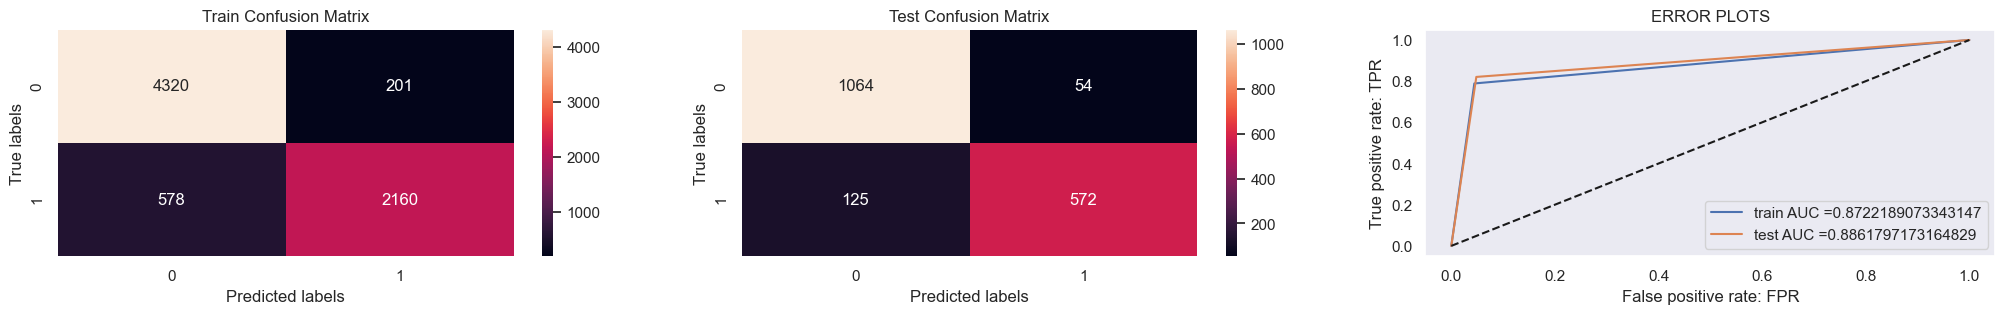

 The optimal_threshold value is  0.24871902808069365


In [75]:
train_roc_auc_nb,test_roc_auc_nb, train_accuracy_nb,test_accuracy_nb, test_precision_nb, test_recall_nb= evaluation_matrix(y_train_pred_nb,y_test_pred_nb, Y_train,Y_test)
mnbc_thresholds = threshold(Y_train,y_proba_nb)

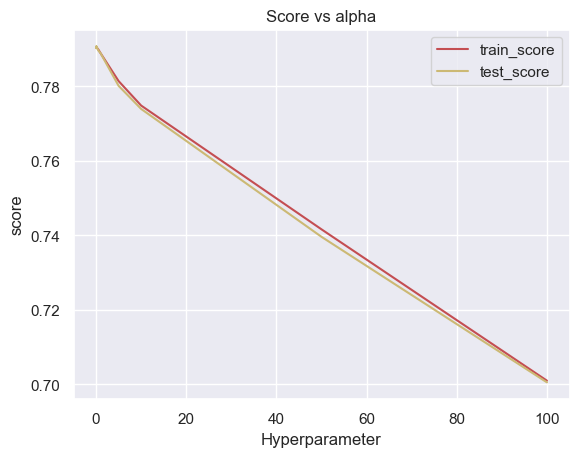

{'alpha': 0.05}
*** Scores from the best model ***
 The train and test roc_auc score are  0.8733583024370162  and  0.8873443046226738
 The train and test precision score are  0.9176570458404074  and  0.9153354632587859
 The train and test Recall score are  0.789627465303141  and  0.8220946915351507
 The train and test Accuracy score are  0.8939247830279653  and  0.9024793388429752
 The train and test f1 score are  0.8488417746368276  and  0.8662131519274376


<Figure size 640x480 with 0 Axes>

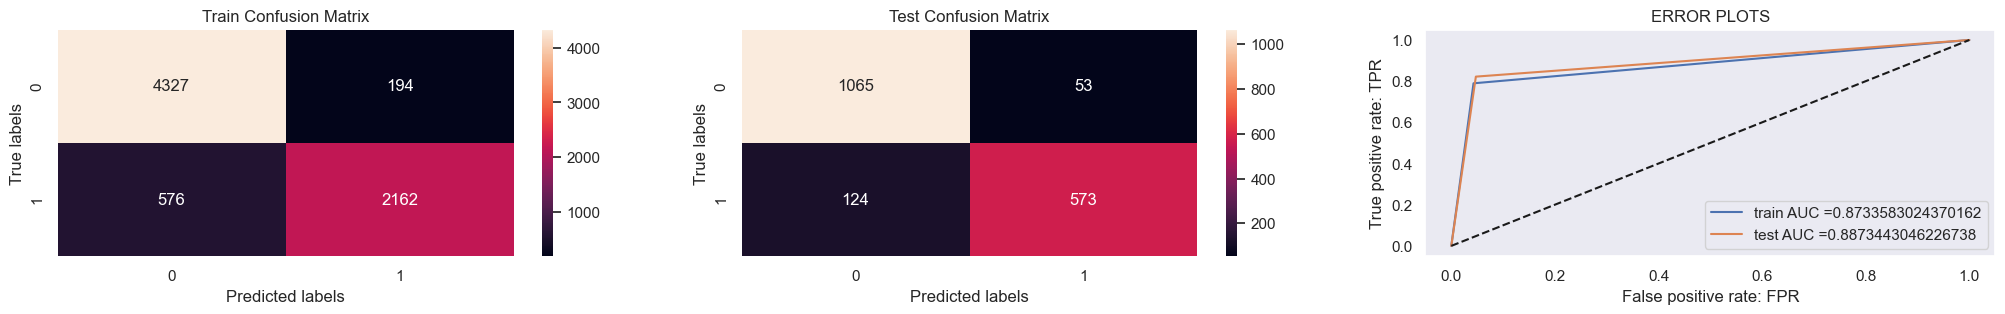

 The optimal_threshold value is  0.24990833117025188


In [76]:
# c is the hyper parameter for logistic regression
parameter = {'alpha' : [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# calling the estimator
clf = MultinomialNB(fit_prior=True)

# GridSearchCV
Gsnb = GridSearchCV(estimator = clf,param_grid = parameter,scoring ='recall', refit = True, return_train_score = True, cv=5)

# Fit the Algorithm
Gsnb.fit(X_train,Y_train)

# plotting the train and test score for various hyperparameter
result = pd.DataFrame(Gsnb.cv_results_)
plt.plot(result['param_alpha'],result['mean_train_score'],'r',label = 'train_score')
plt.plot(result['param_alpha'],result['mean_test_score'],'y',label ='test_score')
plt.xlabel('Hyperparameter')
plt.ylabel('score')
plt.title('Score vs alpha')
plt.legend()
plt.show()

# Predict on the model
y_train_pred_nb_gs = Gsnb.predict(X_train)
y_test_pred_nb_gs = Gsnb.predict(X_test)
y_proba_nb_gs = Gsnb.predict_proba(X_train)

#print best alpha
print(Gsnb.best_params_)
print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_nb_gs,test_roc_auc_nb_gs, train_accuracy_nb_gs,test_accuracy_nb_gs, test_precision_nb_gs, test_recall_nb_gs = evaluation_matrix(y_train_pred_nb_gs, y_test_pred_nb_gs, Y_train,Y_test)
mnbc_gs_thresholds = threshold(Y_train,y_proba_nb_gs)

In [77]:
def decisiontrees(x_train,x_test,y_train):
    '''
    This function trains the  Decision Tree Classifier model and return the predicted train and test value
    '''

    dtc = DecisionTreeClassifier(max_depth = 8,random_state = 42)   # for max_depth = none model was highly overfitting , so use a random depth = 8.

    # Fit the Algorithm
    dtc.fit(x_train,y_train)
    # Predict on the model
    y_train_pred_dtc = dtc.predict(x_train)
    y_test_pred_dtc = dtc.predict(x_test)
    y_proba_dtc = dtc.predict_proba(x_train)
    return y_train_pred_dtc,y_test_pred_dtc,y_proba_dtc,dtc

y_train_pred_dtc,y_test_pred_dtc,y_proba_dtc,dtc = decisiontrees(X_train,X_test,Y_train)

 The train and test roc_auc score are  0.9357865954334686  and  0.9338527243001568
 The train and test precision score are  0.9693227091633466  and  0.9598145285935085
 The train and test Recall score are  0.8886048210372535  and  0.890961262553802
 The train and test Accuracy score are  0.9473756715801075  and  0.943801652892562
 The train and test f1 score are  0.9272103658536586  and  0.9241071428571429


<Figure size 640x480 with 0 Axes>

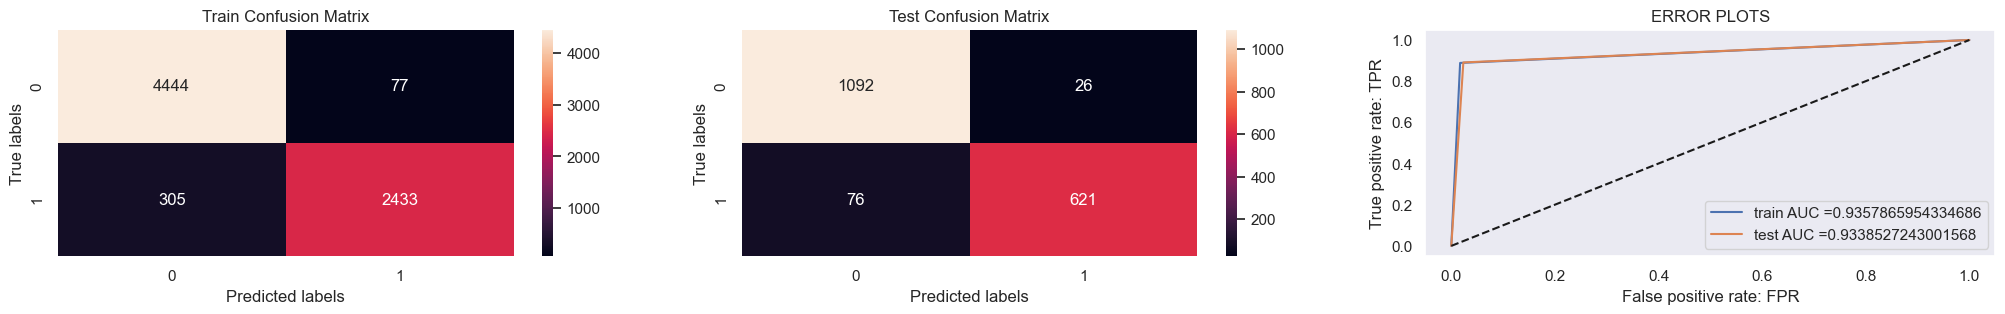

 The optimal_threshold value is  0.5


In [78]:
train_roc_auc_dtc,test_roc_auc_dtc, train_accuracy_dtc,test_accuracy_dtc, test_precision_dtc, test_recall_dtc= evaluation_matrix(y_train_pred_dtc,y_test_pred_dtc, Y_train,Y_test)
dtc_thresholds = threshold(Y_train,y_proba_dtc)

----------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The best parameters are: {'max_depth': 8, 'min_samples_split': 100}
The scores on best parameters are:
*** Scores from the best model ***
 The train and test roc_auc score are  0.9303623105161871  and  0.9369082420698983
 The train and test precision score are  0.9489676665368134  and  0.9515885022692889
 The train and test Recall score are  0.8897005113221329  and  0.9024390243902439
 The train and test Accuracy score are  0.9403499104559857  and  0.9449035812672176
 The train and test f1 score are  0.9183788878416588  and  0.9263622974963182


<Figure size 2500x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

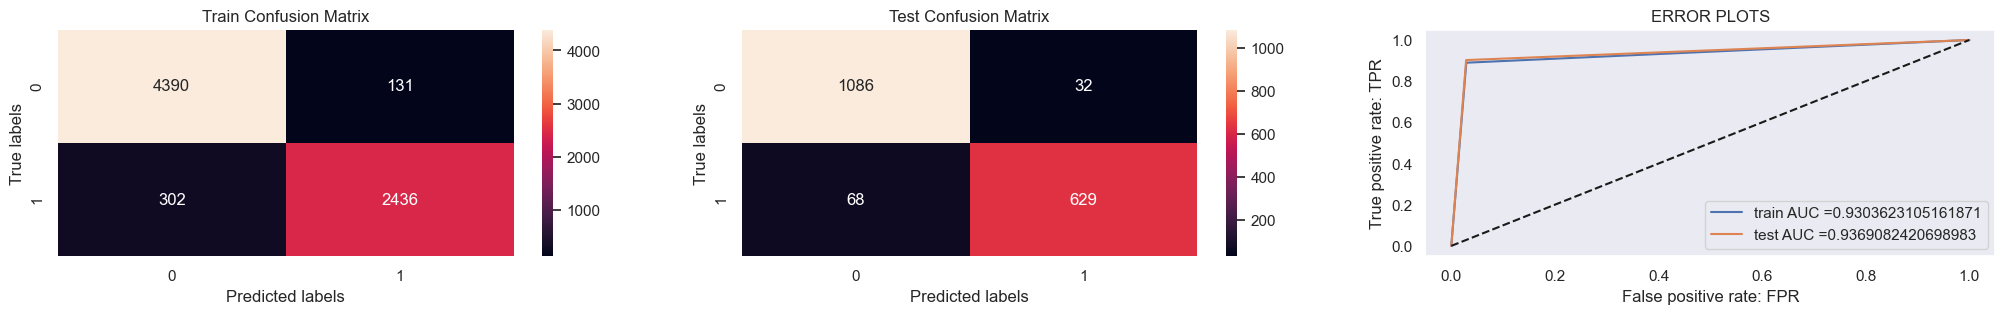

 The optimal_threshold value is  0.5


In [79]:
# c is the hyper parameter for logistic regression
parameter = {'max_depth' : [3,5,7,8], 'min_samples_split' : [100,200,250,300]}

# calling the estimator
dtc =  DecisionTreeClassifier(random_state = 42)

# GridSearchCV
Gsdtc = GridSearchCV(estimator =dtc, param_grid = parameter, scoring ='roc_auc', refit = True, return_train_score = True,cv=5)

# Fit the Algorithm
Gsdtc.fit(X_train,Y_train)

# plotting the train and test score for various hyperparameter
results = pd.DataFrame(Gsdtc.cv_results_)
train_score_dt = results['mean_train_score']
test_score_dt = results['mean_test_score']
best_max_depth = results['param_max_depth']
print("-"*100)
# Lets plot the results
plt.figure(1)
plt.figure(figsize=(25,10))

#heatmap
# plt.subplot(331)
# dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_train_score')
# ax = sns.heatmap(dataset_train, annot=True)
# plt.title('train_score')

# plt.subplot(332)
# dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_test_score')
# ax = sns.heatmap(dataset_train, annot=True)
# plt.title('CV_score')

# plt.subplot(333)
# plt.plot(best_max_depth,train_score_dt,'r',label = 'train_score')
# plt.plot(best_max_depth,test_score_dt,'y',label ='test_score')
# plt.xlabel('depth')
# plt.ylabel('score')
# plt.title('score vs depth')
# plt.legend()
# plt.show()

print("-"*200)
print("The best parameters are:",Gsdtc.best_params_)
print("The scores on best parameters are:")

# Predict on the model
y_train_pred_dtc_gs = Gsdtc.predict(X_train)
y_test_pred_dtc_gs = Gsdtc.predict(X_test)
y_proba_dtc_gs = Gsdtc.predict_proba(X_train)

#print best alpha

print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_dtc_gs,test_roc_auc_dtc_gs, train_accuracy_dtc_gs,test_accuracy_dtc_gs, test_precision_dtc_gs, test_recall_dtc_gs = evaluation_matrix(y_train_pred_dtc_gs, y_test_pred_dtc_gs, Y_train,Y_test)
dtc_gs_thresholds = threshold(Y_train,y_proba_dtc_gs)

In [80]:
def Randomforest(x_train,x_test,y_train):
    '''
    This function trains the  Random forest Classifier model and return the predicted train and test value
    '''

    rfc = RandomForestClassifier(max_depth = 10, n_estimators = 200, min_samples_split = 100,random_state = 42)   # using the best hyperparameter obtained from decision trees with n_estimator =200

    # Fit the Algorithm
    rfc.fit(x_train,y_train)
    # Predict on the model
    y_train_pred_rfc = rfc.predict(x_train)
    y_test_pred_rfc = rfc.predict(x_test)
    y_proba_rfc = rfc.predict_proba(x_train)
    return y_train_pred_rfc,y_test_pred_rfc,y_proba_rfc,rfc

y_train_pred_rfc,y_test_pred_rfc,y_proba_rfc,rfc = Randomforest(X_train,X_test,Y_train)

 The train and test roc_auc score are  0.9167252763622855  and  0.926324934616283
 The train and test precision score are  0.9556369556369556  and  0.9533437013996889
 The train and test Recall score are  0.8575602629656683  and  0.8794835007173601
 The train and test Accuracy score are  0.9312577490012398  and  0.9371900826446281
 The train and test f1 score are  0.9039461020211742  and  0.9149253731343283


<Figure size 640x480 with 0 Axes>

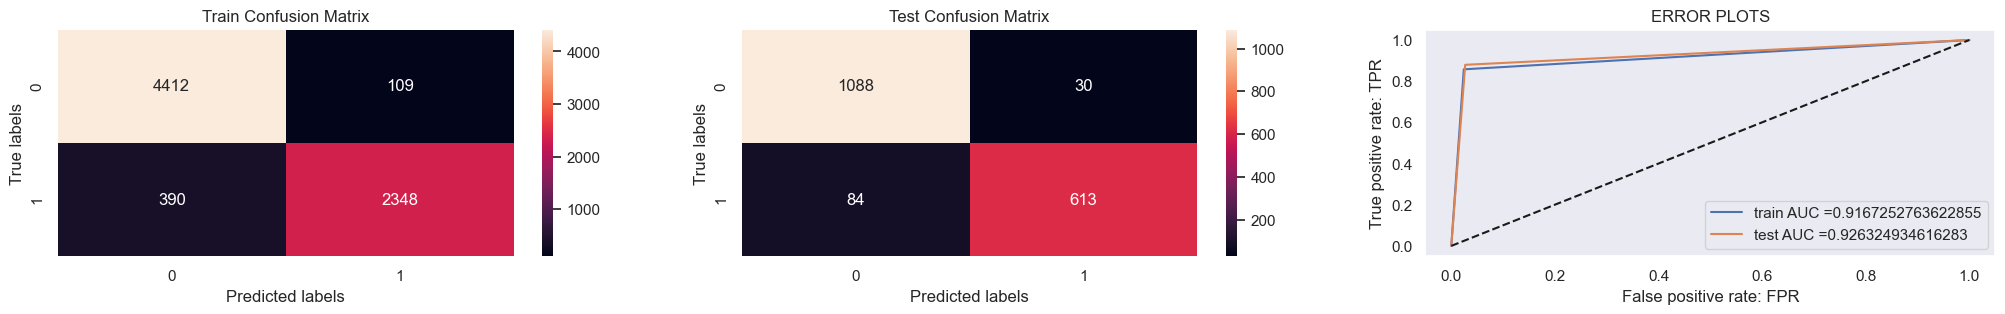

 The optimal_threshold value is  0.4005320365187736


In [81]:
train_roc_auc_rfc,test_roc_auc_rfc, train_accuracy_rfc,test_accuracy_rfc, test_precision_rfc, test_recall_rfc = evaluation_matrix(y_train_pred_rfc, y_test_pred_rfc, Y_train,Y_test)
rfc_thresholds = threshold(Y_train,y_proba_rfc)

RandomForestClassifier(max_depth=13, min_samples_split=200, n_estimators=200,
                       random_state=42)
 The train and test roc_auc score are  0.9171857118690814  and  0.9291943750753935
 The train and test precision score are  0.9504431909750202  and  0.9536321483771252
 The train and test Recall score are  0.8615777940102265  and  0.8852223816355811
 The train and test Accuracy score are  0.9308444689351151  and  0.9393939393939394
 The train and test f1 score are  0.9038314176245211  and  0.9181547619047619


<Figure size 640x480 with 0 Axes>

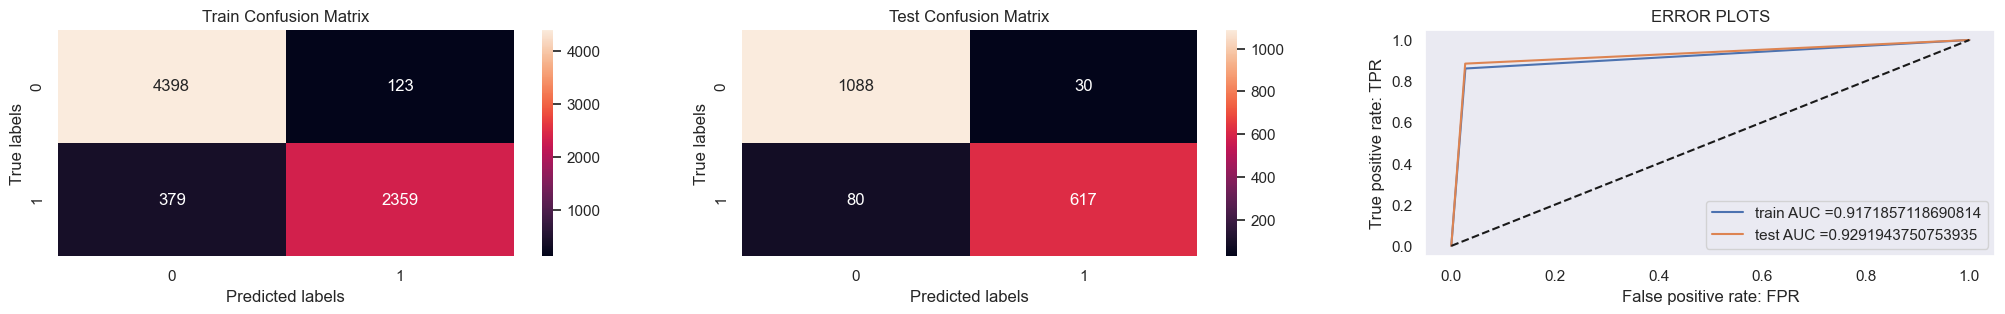

 The optimal_threshold value is  0.4276496900956044


In [82]:
parameter = {'max_depth' : [8,10,11,13], 'n_estimators':[100,150,200,250],'min_samples_split': [100,150,200,300]}

rfc = RandomForestClassifier(random_state=42)

rand_cv = RandomizedSearchCV(estimator = rfc, param_distributions = parameter,n_iter = 5, cv = 5,random_state= 42,n_jobs = -1,refit=True, return_train_score = True)
rand_cv.fit(X_train,Y_train)
print(rand_cv.best_estimator_)
y_train_pred_cv_rf = rand_cv.predict(X_train)
y_test_pred_cv_rf = rand_cv.predict(X_test)
y_proba_cv_rf = rand_cv.predict_proba(X_train)

train_roc_auc_rf_cv,test_roc_auc_rf_cv, train_accuracy_rf_cv,test_accuracy_rf_cv, test_precision_rf_cv, test_recall_rf_cv = evaluation_matrix(y_train_pred_cv_rf, y_test_pred_cv_rf, Y_train,Y_test)
rfc_rand_cv_thresholds = threshold(Y_train,y_proba_cv_rf)

In [83]:
def XGboost(x_train,x_test,y_train):
    '''
    This function trains the  xgboost Classifier model and return the predicted train and test value
    '''

    xgb = XGBClassifier(max_depth = 3, n_estimators = 500, min_samples_split = 100,learning_rate = 0.05,random_state = 42)

    # Fit the Algorithm
    xgb.fit(X_train,Y_train)
    # Predict on the model
    y_train_pred_xgb = xgb.predict(x_train)
    y_test_pred_xgb = xgb.predict(x_test)
    y_proba_xgb = xgb.predict_proba(x_train)
    return y_train_pred_xgb,y_test_pred_xgb,y_proba_xgb,xgb

y_train_pred_xgb,y_test_pred_xgb,y_proba_xgb,xgb = XGboost(X_train,X_test,Y_train)

 The train and test roc_auc score are  0.942630963788983  and  0.9434665048007946
 The train and test precision score are  0.9492231906025009  and  0.9375
 The train and test Recall score are  0.9149013878743608  and  0.9253945480631277
 The train and test Accuracy score are  0.9494420719107315  and  0.9476584022038568
 The train and test f1 score are  0.9317463269481123  and  0.9314079422382672


<Figure size 640x480 with 0 Axes>

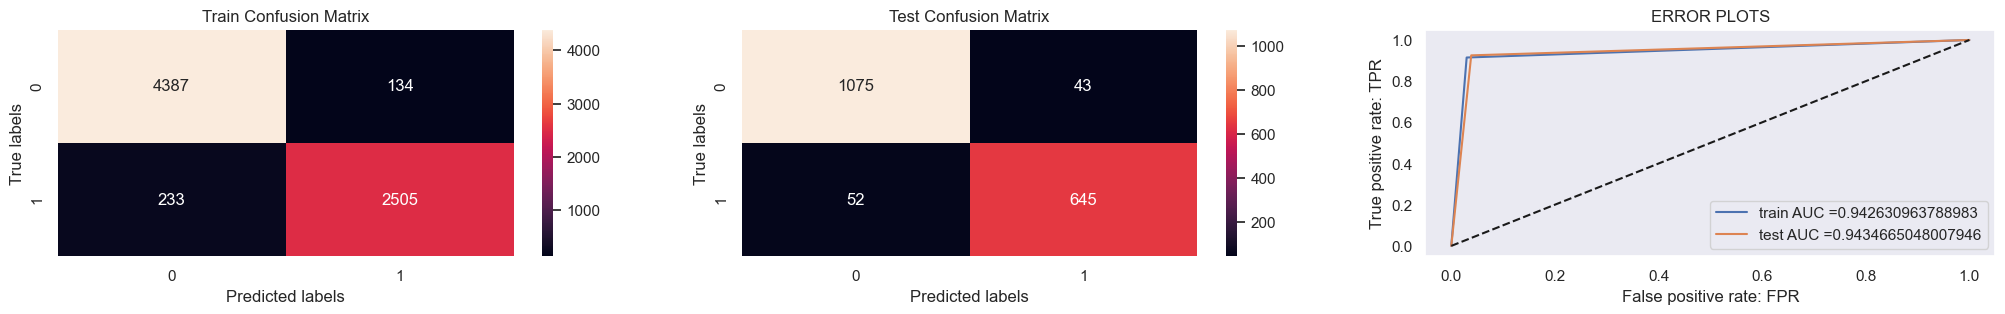

 The optimal_threshold value is  0.37762186


In [84]:
train_roc_auc_xgb,test_roc_auc_xgb, train_accuracy_xgb,test_accuracy_xgb, test_precision_xgb, test_recall_xgb = evaluation_matrix(y_train_pred_xgb,y_test_pred_xgb, Y_train,Y_test)
xgb_thresholds = threshold(Y_train,y_proba_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, min_samples_split=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=700,
              n_jobs=None, num_parallel_tree=None, ...)
 The train and test roc_auc score are  0.9405450483572402  and  0.943373466145479
 The train and test precision score are  0.9476082004555809  and  0.9414348462664714
 The train and test Recall score are  0.9116143170197224  and  0.9225251076

<Figure size 640x480 with 0 Axes>

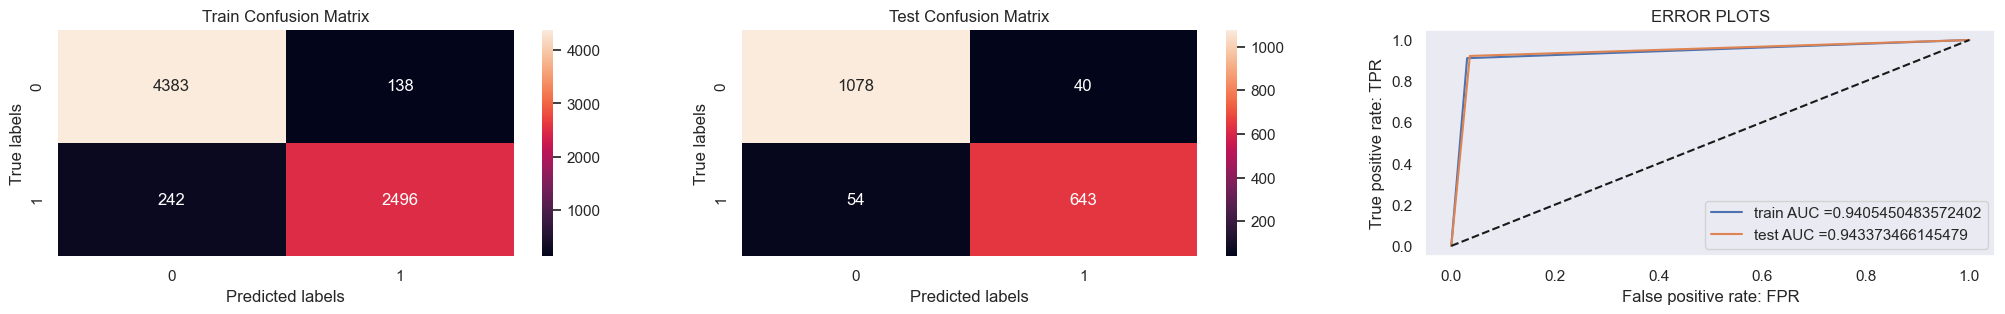

 The optimal_threshold value is  0.39478108


In [85]:
xgbc = XGBClassifier(random_state = 42)
parameter = {'max_depth' : [1,2,3,4,5], 'n_estimators':[300,350,500,700],'min_samples_split': [50,100,150], 'learning_rate' :[0.05,0.07,0.1]}
# using GridSearchCV will have 4*4*3*4 =192 models so will use RandomizedSearchCv for just 10 models to find the hyperparameter
randx_cv = RandomizedSearchCV(estimator = xgbc, param_distributions = parameter, n_iter = 5,cv =5, refit = True,random_state= 42,n_jobs = -1, return_train_score = True)
randx_cv.fit(X_train,Y_train)
print(randx_cv.best_estimator_)
y_train_pred_cv_xb = randx_cv.predict(X_train)
y_test_pred_cv_xb = randx_cv.predict(X_test)
y_proba_cv_xb = randx_cv.predict_proba(X_train)
train_roc_auc_xb_cv,test_roc_auc_xb_cv, train_accuracy_xb_cv,test_accuracy_xb_cv, test_precision_xb_cv, test_recall_xb_cv = evaluation_matrix(y_train_pred_cv_xb, y_test_pred_cv_xb, Y_train,Y_test)
randx_thresholds = threshold(Y_train,y_proba_cv_xb)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
def KNClassifier(x_train,x_test,y_train):
    '''
    This function trains the  Random forest Classifier model and return the predicted train and test value
    '''

    knc = KNeighborsClassifier()

    # Fit the Algorithm
    knc.fit(x_train,y_train)
    # Predict on the model
    y_train_pred_knc = knc.predict(x_train)
    y_test_pred_knc = knc.predict(x_test)
    y_proba_knc = knc.predict_proba(x_train)
    return y_train_pred_knc,y_test_pred_knc,y_proba_knc,knc

y_train_pred_knc,y_test_pred_knc,y_proba_knc,knc = KNClassifier(X_train,X_test,Y_train)

 The train and test roc_auc score are  0.9258408411101251  and  0.9098705671893087
 The train and test precision score are  0.9262759924385633  and  0.8978102189781022
 The train and test Recall score are  0.8948137326515705  and  0.8823529411764706
 The train and test Accuracy score are  0.9334619093539055  and  0.9162534435261708
 The train and test f1 score are  0.9102730819245773  and  0.8900144717800289


<Figure size 640x480 with 0 Axes>

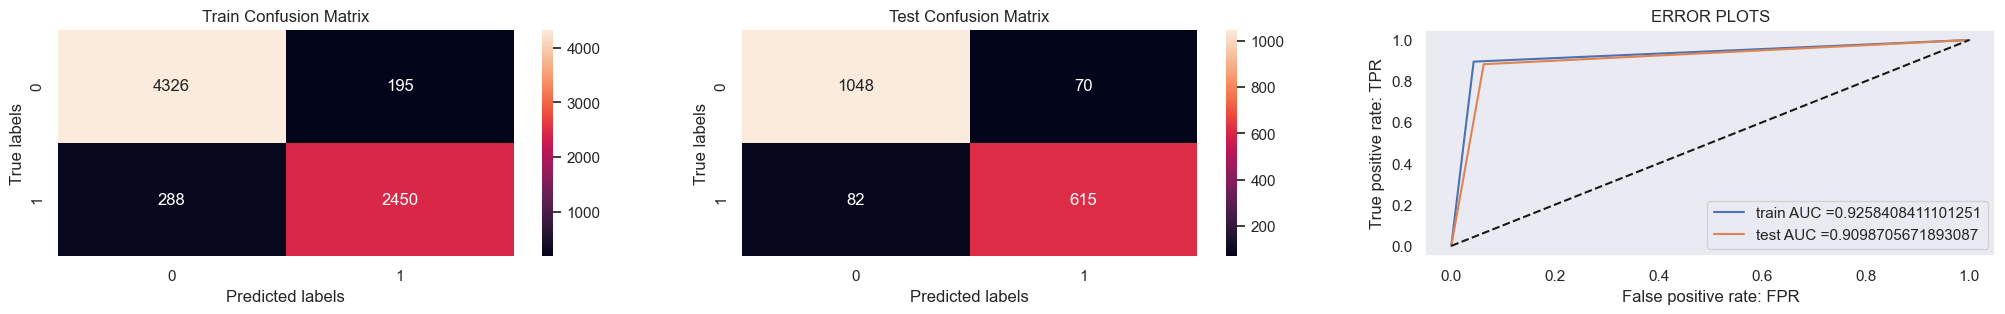

 The optimal_threshold value is  0.6


In [87]:
train_roc_auc_knc,test_roc_auc_knc, train_accuracy_knc,test_accuracy_knc, test_precision_knc, test_recall_knc = evaluation_matrix(y_train_pred_knc,y_test_pred_knc, Y_train,Y_test)
knc_thresholds = threshold(Y_train,y_proba_knc)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The best parameters are: {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
The scores on best parameters are:
*** Scores from the best model ***
 The train and test roc_auc score are  0.9109435571262361  and  0.907178220998247
 The train and test precision score are  0.9253030895580758  and  0.8997050147492626
 The train and test Recall score are  0.8641344046749452  and  0.8751793400286944
 The train and test Accuracy score are  0.9224411075905772  and  0.9146005509641874
 The train and test f1 score are  0.8936732766761095  and  0.8872727272727273


<Figure size 640x480 with 0 Axes>

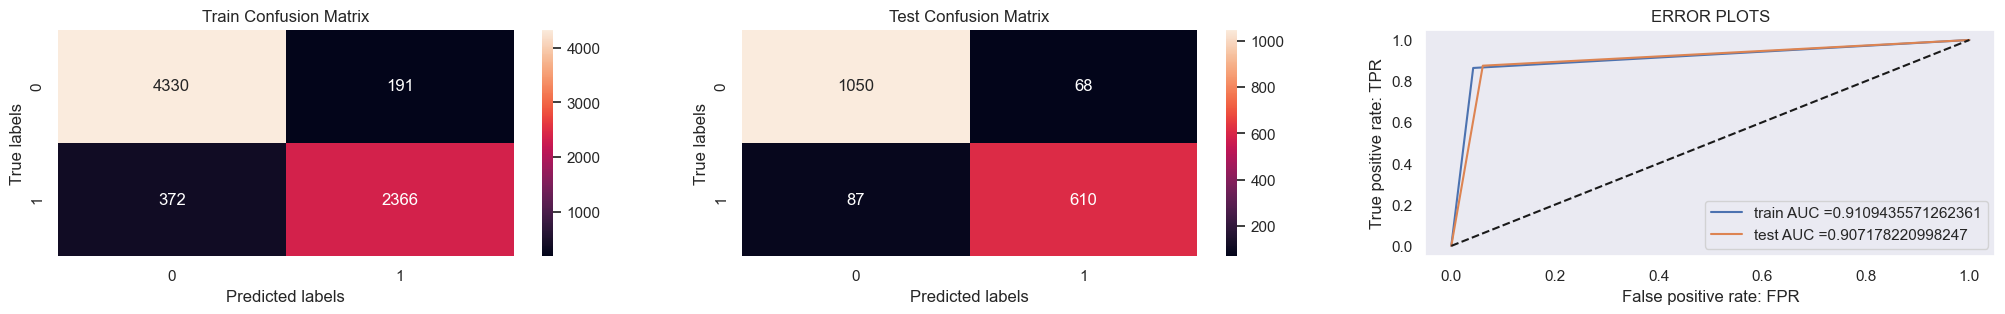

 The optimal_threshold value is  0.4


In [88]:
# c is the hyper parameter for logistic regression

# define grid search
parameter = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# calling the estimator
knc = KNeighborsClassifier()

# GridSearchCV
Gsknc = GridSearchCV(estimator =knc, param_grid = parameter, scoring ='roc_auc', refit = True, return_train_score = True,cv=5)

# Fit the Algorithm
Gsknc.fit(X_train,Y_train)

print("-"*200)
print("The best parameters are:",Gsknc.best_params_)
print("The scores on best parameters are:")

# Predict on the model
y_train_pred_knc_gs = Gsknc.predict(X_train)
y_test_pred_knc_gs = Gsknc.predict(X_test)
y_proba_knc_gs = Gsknc.predict_proba(X_train)

#print best alpha

print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_knc_gs,test_roc_auc_knc_gs, train_accuracy_knc_gs,test_accuracy_knc_gs, test_precision_knc_gs, test_recall_knc_gs = evaluation_matrix(y_train_pred_knc_gs, y_test_pred_knc_gs, Y_train,Y_test)
knc_gs_thresholds = threshold(Y_train,y_proba_knc_gs)

In [90]:
print("-"*50,"Models without hyperparameter tuning ",'-'*50)
from prettytable import PrettyTable

Table = PrettyTable()

Table.field_names = ["Model ","Threshold","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table.add_row(["LogRegression", round(logistic_thresholds,5),round(train_roc_auc_log,5), round(test_roc_auc_log,5),round(train_accuracy_log,5),round(test_accuracy_log,5),round(test_precision_log,5),round(test_recall_log,5)])
Table.add_row(["MultiNaiveBayes",round(mnbc_thresholds,5),round(train_roc_auc_nb,5), round(test_roc_auc_nb,5),round(train_accuracy_nb,5),round(test_accuracy_nb,5),round(test_precision_nb,5),round(test_recall_nb,5)])
Table.add_row(["Decision tree ",round(dtc_thresholds,5), round(train_roc_auc_dtc,5), round(test_roc_auc_dtc,5),round(train_accuracy_dtc,5),round(test_accuracy_dtc,5),round(test_precision_dtc,5),round(test_recall_dtc,5)])
Table.add_row(["Random forest", round(rfc_thresholds,5),round(train_roc_auc_rfc,5), round(test_roc_auc_rfc,5),round(train_accuracy_rfc,5),round(test_accuracy_rfc,5),round(test_precision_rfc,5),round(test_recall_rfc,5)])
Table.add_row(["KNClassifier",round(knc_thresholds,5),round(train_roc_auc_knc,5), round(test_roc_auc_knc,5),round(train_accuracy_knc,5),round(test_accuracy_knc,5),round(test_precision_knc,5),round(test_recall_knc,5)])
Table.add_row(["Xgboost",round(xgb_thresholds,5),round(train_roc_auc_xgb,5), round(test_roc_auc_xgb,5),round(train_accuracy_xgb,5),round(test_accuracy_xgb,5),round(test_precision_xgb,5),round(test_recall_xgb,5)])

print(Table)

-------------------------------------------------- Models without hyperparameter tuning  --------------------------------------------------
+-----------------+-----------+---------------+--------------+----------------+---------------+----------------+-------------+
|      Model      | Threshold | Train roc_auc | Test roc_auc | Train accuracy | Test accuracy | Test precision | Test Recall |
+-----------------+-----------+---------------+--------------+----------------+---------------+----------------+-------------+
|  LogRegression  |  0.44315  |     0.9338    |   0.93791    |    0.94104     |    0.94215    |    0.92899     |   0.91966   |
| MultiNaiveBayes |  0.24872  |    0.87222    |   0.88618    |    0.89268     |    0.90138    |    0.91374     |   0.82066   |
|  Decision tree  |    0.5    |    0.93579    |   0.93385    |    0.94738     |     0.9438    |    0.95981     |   0.89096   |
|  Random forest  |  0.40053  |    0.91673    |   0.92632    |    0.93126     |    0.93719    |   

In [91]:
print("-"*50,"Models with hyperparameter tuning ",'-'*50)
from prettytable import PrettyTable

Table2 = PrettyTable()

Table2.field_names = ["Model ","Threshold","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table2.add_row(["LogRegression", round(logistic_gs_thresholds,5),round(train_roc_auc_log_gs,5), round(test_roc_auc_log_gs,5),round(train_accuracy_log_gs,5),round(test_accuracy_log_gs,5),round(test_precision_log_gs,5),round(test_recall_log_gs,5)])
Table2.add_row(["MultiNaiveBayes",round(mnbc_gs_thresholds,5),round(train_roc_auc_nb_gs,5), round(test_roc_auc_nb_gs,5),round(train_accuracy_nb_gs,5),round(test_accuracy_nb_gs,5),round(test_precision_nb_gs,5),round(test_recall_nb_gs,5)])
Table2.add_row(["Decision tree ",round(dtc_gs_thresholds,5), round(train_roc_auc_dtc_gs,5), round(test_roc_auc_dtc_gs,5),round(train_accuracy_dtc_gs,5),round(test_accuracy_dtc_gs,5),round(test_precision_dtc_gs,5),round(test_recall_dtc_gs,5)])
Table2.add_row(["Random forest", round(rfc_rand_cv_thresholds,5),round(train_roc_auc_rf_cv,5), round(test_roc_auc_rf_cv,5),round(train_accuracy_rf_cv,5),round(test_accuracy_rf_cv,5),round(test_precision_rf_cv,5),round(test_recall_rf_cv,5)])
Table2.add_row(["KNClassifier",round(knc_gs_thresholds,5),round(train_roc_auc_knc_gs,5), round(test_roc_auc_knc_gs,5),round(train_accuracy_knc_gs,5),round(test_accuracy_knc_gs,5),round(test_precision_knc_gs,5),round(test_recall_knc_gs,5)])
Table2.add_row(["Xgboost",round(randx_thresholds,5),round(train_roc_auc_xb_cv,5), round(test_roc_auc_xb_cv,5),round(train_accuracy_xb_cv,5),round(test_accuracy_xb_cv,5),round(test_precision_xb_cv,5),round(test_recall_xb_cv,5)])

print(Table2)

-------------------------------------------------- Models with hyperparameter tuning  --------------------------------------------------
+-----------------+-----------+---------------+--------------+----------------+---------------+----------------+-------------+
|      Model      | Threshold | Train roc_auc | Test roc_auc | Train accuracy | Test accuracy | Test precision | Test Recall |
+-----------------+-----------+---------------+--------------+----------------+---------------+----------------+-------------+
|  LogRegression  |  0.44085  |    0.93507    |   0.93971    |    0.94173     |     0.9427    |    0.92418     |   0.92683   |
| MultiNaiveBayes |  0.24991  |    0.87336    |   0.88734    |    0.89392     |    0.90248    |    0.91534     |   0.82209   |
|  Decision tree  |    0.5    |    0.93036    |   0.93691    |    0.94035     |     0.9449    |    0.95159     |   0.90244   |
|  Random forest  |  0.42765  |    0.91719    |   0.92919    |    0.93084     |    0.93939    |    0.

In [92]:
joblib.dump(randx_cv, '.\..\savedmodels\model.pkl')

['.\\..\\savedmodels\\model.pkl']

In [ ]:
from prettytable import PrettyTable
Table = PrettyTable()

Table.field_names = ["Model ","Threshold ","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table.add_row(["Log Regression", round(train_roc_auc_log,6), round(test_roc_auc_log,6),round(train_accuracy_log,6),round(test_accuracy_log,6),round(test_precision_log,6),round(test_recall_log,6)])
Table.add_row(["Multi Naive Bayes",round(train_roc_auc_nb,6), round(test_roc_auc_nb,6),round(train_accuracy_nb,6),round(test_accuracy_nb,6),round(test_precision_nb,6),round(test_recall_nb,6)])
Table.add_row(["Decision tree ", round(train_roc_auc_dtc,6), round(test_roc_auc_dtc,6),round(train_accuracy_dtc,6),round(test_accuracy_dtc,6),round(test_precision_dtc,6),round(test_recall_dtc,6)])
Table.add_row(["Random forest", round(train_roc_auc_rf,6), round(test_roc_auc_rf,6),round(train_accuracy_rf,6),round(test_accuracy_rf,6),round(test_precision_rf,6),round(test_recall_rf,6)])
Table.add_row(["xgboost",round(train_roc_auc_xb,6), round(test_roc_auc_xb,6),round(train_accuracy_xb,6),round(test_accuracy_xb,6),round(test_precision_xb,6),round(test_recall_xb,6)])


print(Table)